#Importar librerías

In [25]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import rbf_kernel

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import linkage, dendrogram
import networkx as nx
from sklearn.manifold import TSNE
import seaborn as sns

# Descarga de Datos

In [26]:
#data = pd.read_csv('https://raw.githubusercontent.com/mbaroja/TFM/data/data_cleaned.csv', delimiter=';')
data = pd.read_csv('https://raw.githubusercontent.com/mbaroja/TFM/data/data_cleaned_only_avgcolumns.csv', delimiter=';')
#data = pd.read_csv('https://raw.githubusercontent.com/mbaroja/TFM/data/data_cleaned_without_avgcolumns.csv', delimiter=';')

# Preprocesado de Datos

In [27]:
#Preprocesado de datos ya que Spectral Clustering requiere datos numéricos para calcular la matriz de afinidad y realizar el clustering

#identificar las columnas que contienen valores de texto en el conjunto de datos
data_text = data.select_dtypes(include='object')
# aplicar la codificación one-hot utilizando el método get_dummies de Pandas para convertir esas columnas en columnas numéricas
data_encoded = pd.get_dummies(data_text)

In [28]:
#una vez que preprocesados los datos, combinar las columnas numéricas procesadas con el resto del conjunto de datos.
data_numeric = data.select_dtypes(exclude='object')
data_processed = pd.concat([data_numeric, data_encoded], axis=1)

# Crear matriz de características (feature matrix)

In [29]:
# Crear una matriz de características (feature matrix) a partir de los datos:
X = data_processed.values

# Aplicar el algoritmo de clustering espectral

In [ ]:
# Experimentar con diferentes configuraciones para obtener resultados óptimos:

#0. Calcular la matriz de afinidad según distancia euclideana (A) o RBF (B)

#1. n_clusters: Este parámetro determina el número de clusters que se deben generar.
#    Probar diferentes valores para encontrar el número óptimo de clusters en los datos. Usar
#2. assign_labels: Este parámetro determina cómo se asignan las etiquetas a los clusters.
#   'kmeans' para utilizar el algoritmo K-means o
#   'discretize' para discretizar los valores propios (eigenvalues) de la matriz de afinidad.
#3. random_state: Este parámetro controla la reproducibilidad de los resultados.
#    Fijar un valor específico para obtener los mismos resultados cada vez que se ejecute el algoritmo.

#Además,se ajustarán otros parámetros según las necesidades:

#gamma: Si se utiliza una matriz de afinidad basada en RBF, se puede ajustar el valor de gamma para controlar la escala de la función de base radial.
#Un valor más alto de gamma puede llevar a una asignación más precisa, pero también puede hacer que el algoritmo sea más sensible al ruido.

#eigen_solver: Este parámetro controla el algoritmo utilizado para calcular los valores y vectores propios (eigenvalues y eigenvectors)
#de la matriz de afinidad. Probar diferentes opciones, como 'arpack' o 'lobpcg', para obtener resultados diferentes.


# A) Aplicar el algoritmo de clustering espectral calculando la matriz de afinidad utilizando la DISTANCIA EUCLIDEANA

In [30]:
#utilizar la función pairwise_distances de scikit-learn para calcular la matriz de afinidad utilizando la distancia euclidiana entre las muestras en X
affinity_matrix_euclidean = pairwise_distances(X, metric='euclidean')

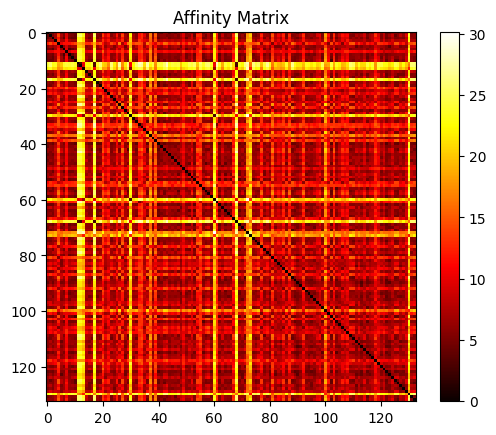

In [7]:
#Visualización de matriz de similitud
#Esto puede proporcionar información sobre las relaciones de similitud entre las muestras
plt.imshow(affinity_matrix_euclidean, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Affinity Matrix')
plt.show()

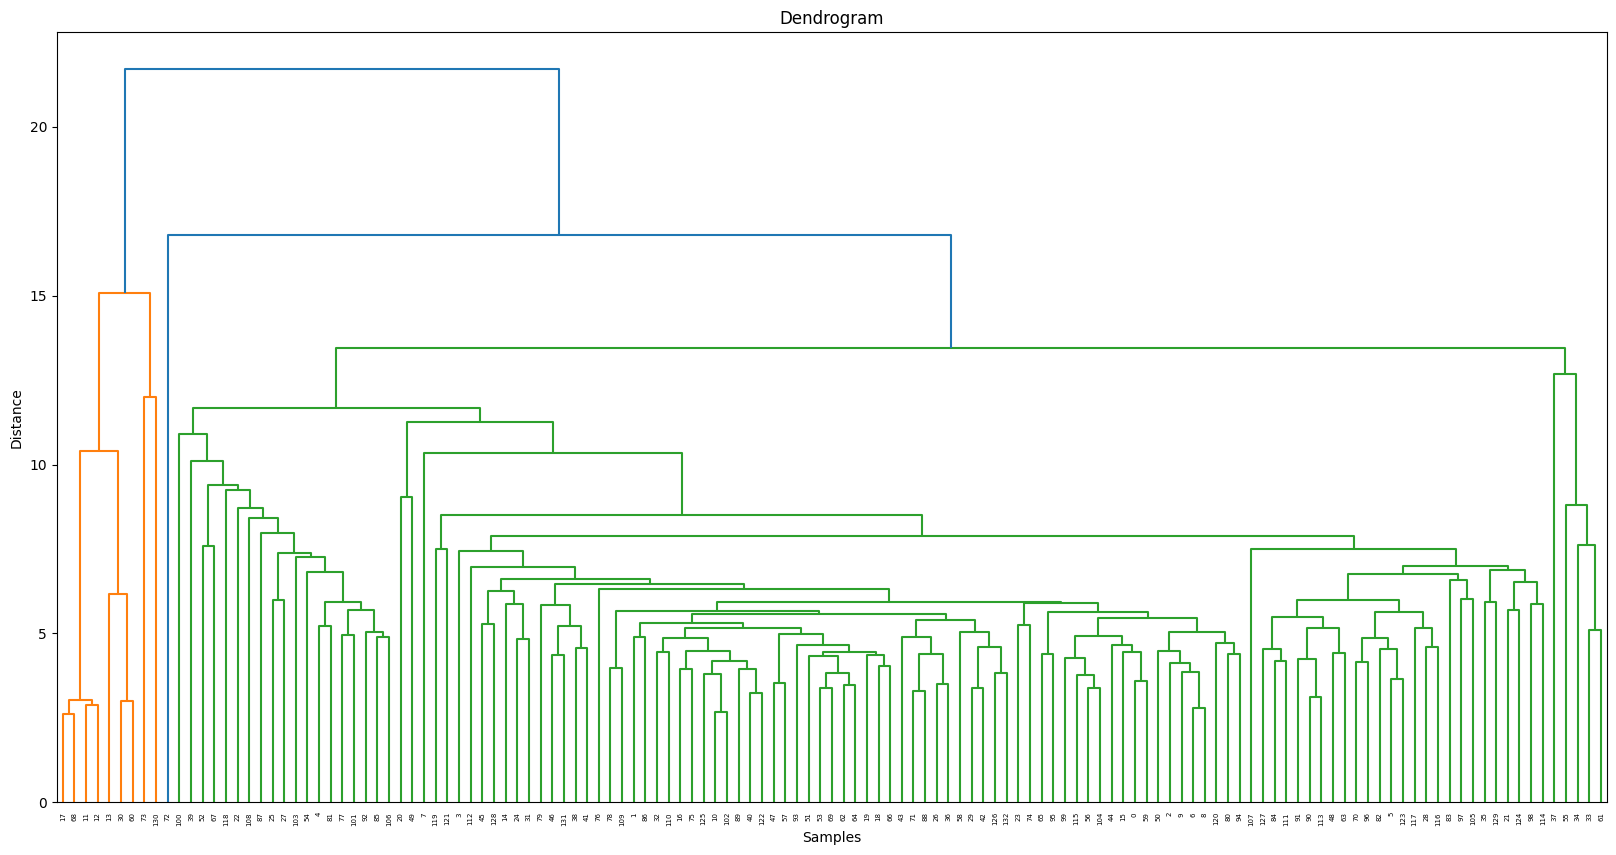

In [8]:
#Visualización de gráfico de dendrograma

# Calcular la matriz de enlace jerárquico
Z = linkage(X, method='average', metric='euclidean')

# Dibujar el dendrograma
plt.figure(figsize=(20, 10))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

## A.1) matriz de afinidad=distancia euclidiana y assign_labels=discretize

## A.1.1) Clustering1: matriz de afinidad euclideana - discretize - n_clusters=4

In [9]:
n_clusters = 4    #número de clusters que se desea obtener
spectral_clustering1 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='discretize', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels1 = spectral_clustering1.fit_predict(affinity_matrix_euclidean)
labels1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [ ]:
data_processed['Cluster']=labels1
data_processed

,V1,V2,V3,SA1,SA2,SA3,SI0,SI1,SI2,SP1,...,EQUIPO_rflidbinih,EDAD_ijawrgtfuz,EDAD_omygfsbzgq,EDAD_pqgwhrmfdu,EDAD_qmsudmubli,EDAD_vjekcogdhn,GENERO_Femenino,GENERO_Masculino,GENERO_No binario,Cluster
0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,...,0,0,0,1,0,0,0,1,0,0
1,4.0,5.0,3.0,5.0,5.0,5.0,4.0,5.0,6.0,2.0,...,0,0,0,1,0,0,0,1,0,0
2,5.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,3.0,...,0,0,1,0,0,0,1,0,0,0
3,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,...,0,0,0,1,0,0,0,1,0,0
4,2.0,2.0,2.0,1.0,1.0,1.0,4.0,5.0,5.0,1.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,4.0,4.0,4.0,5.0,4.0,5.0,2.0,4.0,4.0,2.0,...,0,0,0,0,1,0,0,0,0,0
129,2.0,3.0,4.0,5.0,4.0,4.0,3.0,6.0,4.0,1.0,...,0,0,0,0,1,0,0,0,0,0
130,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0,0,0,0,1,0,0,0,0,0
131,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
data_processed.to_csv("spectralClusteringLabels1_data_cleaned.csv", sep=";", index=False)

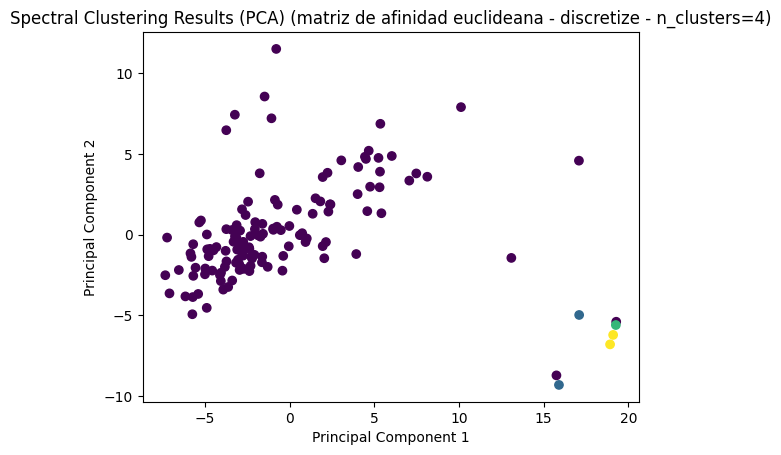

In [10]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labels1)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad euclideana - discretize - n_clusters=4)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels1)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad euclideana - discretize - n_clusters=4)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels1)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad euclideana - discretize - n_clusters=4)')
    plt.show()

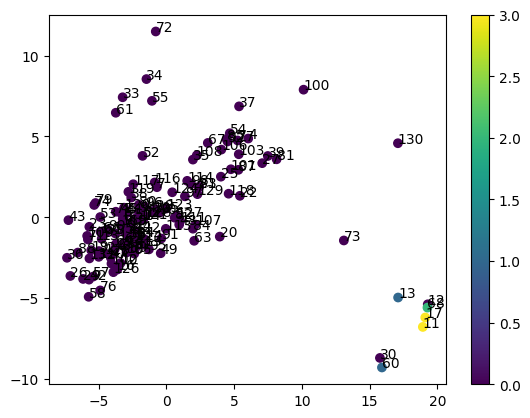

In [11]:
# X_pca[:, 0] son los valores en el eje x
# X_pca[:, 1] son los valores en el eje y
# labels1 son las etiquetas de los grupos

# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels1)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labels1):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [12]:
from sklearn.metrics import pairwise_distances, silhouette_score, silhouette_samples
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, labels1)
silhouette_avg

0.5026310659487421

In [13]:
# Calcular el índice de silueta para cada muestra

silhouette_values = silhouette_samples(data_processed, labels1)


# Calcular el índice de silueta individual promedio para cada clúster

cluster_indices = sorted(set(labels1))

for cluster_idx in cluster_indices:

    # Obtener las muestras pertenecientes al clúster actual

    cluster_samples = silhouette_values[labels1 == cluster_idx]

    cluster_avg_silhouette = cluster_samples.mean()

    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")


Índice de Silueta del Clúster 0: 0.5170093393936301
Índice de Silueta del Clúster 1: 0.33434893873555754
Índice de Silueta del Clúster 2: 0.0
Índice de Silueta del Clúster 3: 0.0020192256634633254


In [14]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering1.n_clusters):

    cluster_indices = np.where(labels1 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")




Cluster 1:
- Atributo n. 1: V_media (Media: 4.0)
- Atributo n. 4: SP_media (Media: 2.41015625)
- Atributo n. 2: SA_media (Media: 4.078125)
- Atributo n. 3: SI_media (Media: 4.048177083333333)
- Atributo n. 11: CJ_media (Media: 2.8697916666666665)
Cluster 2:
- Atributo n. 2: SA_media (Media: 3.8333333333333335)
- Atributo n. 4: SP_media (Media: 3.6666666666666665)
- Atributo n. 7: CH_media (Media: 3.6666666666666665)
- Atributo n. 3: SI_media (Media: 5.0)
- Atributo n. 5: SF_media (Media: 4.333333333333333)
Cluster 3:
- Atributo n. 2: SA_media (Media: 3.6666666666666665)
- Atributo n. 3: SI_media (Media: 4.333333333333333)
- Atributo n. 1: V_media (Media: 3.6666666666666665)
- Atributo n. 11: CJ_media (Media: -1.0)
- Atributo n. 15: LA_media (Media: -1.0)
Cluster 4:
- Atributo n. 2: SA_media (Media: 5.0)
- Atributo n. 3: SI_media (Media: 4.833333333333334)
- Atributo n. 1: V_media (Media: 4.666666666666666)
- Atributo n. 11: CJ_media (Media: -1.0)
- Atributo n. 14: LS_media (Media: -1.0

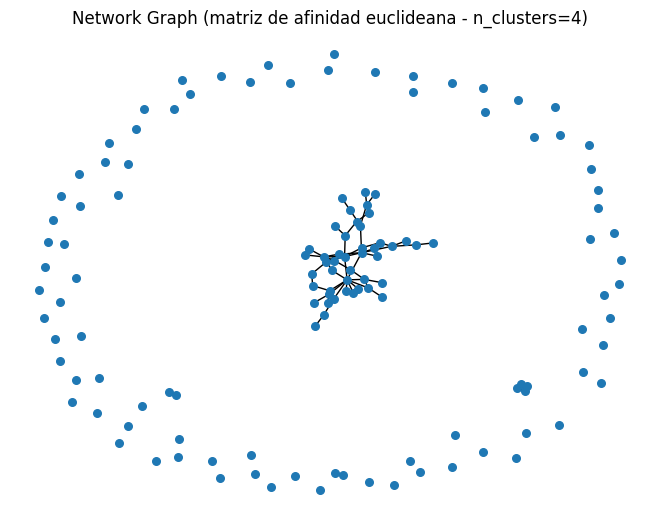

In [15]:
#Visualización de gráfico de red (Network graph)
#Esto puede revelar patrones de conectividad entre los clústeres
#NO DEPENDE DEL PARÁMETRO assign_labels

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo
for i in range(len(X)):
    G.add_node(i)

umbral = 4   #ajustar el valor de umbral para controlar la cantidad de conexiones en el gráfico de red

# Agregar aristas al grafo basadas en las conexiones entre las muestras
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if affinity_matrix_euclidean[i, j] < umbral:
            G.add_edge(i, j)

# Dibujar el grafo
nx.draw(G, with_labels=False, node_size=30)
plt.title('Network Graph (matriz de afinidad euclideana - n_clusters=4)')
plt.show()


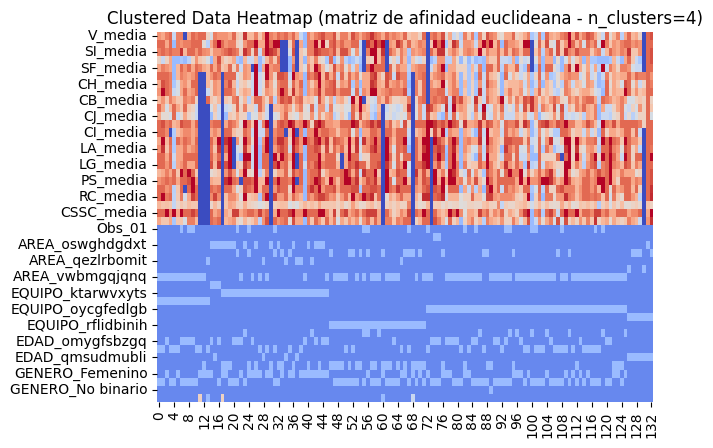

In [16]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labels1

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=4)')
plt.show()


## A.1.2) Clustering2:  matriz de afinidad euclideana - discretize - n_clusters=97

In [31]:
n_clusters = 97    #número de clusters que se desea obtener; porque son 97 preguntas
spectral_clustering2 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='discretize', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels2 = spectral_clustering2.fit_predict(affinity_matrix_euclidean)
labels2

array([44, 37, 83, 16, 74, 66, 31, 40, 12, 94, 68, 36, 22, 34, 63, 24, 33,
        5,  3, 15, 56, 75, 16, 87, 88, 65, 77,  7, 49, 38,  2, 96, 71, 11,
       53, 45, 27, 63, 42, 69, 10, 82, 67, 96, 32, 71, 63, 81, 62, 91, 64,
       54, 13,  1, 69, 72, 59, 51,  0,  3, 61, 69, 57, 93, 30,  6, 73, 74,
       48, 92, 87, 47, 42, 65, 68,  4, 33, 35, 33, 45, 89, 43,  6,  9, 58,
       56, 16, 91, 14, 52, 46, 49, 17, 45,  8, 50, 55,  4, 78, 79, 29, 20,
       32, 49, 93,  7, 26, 82, 40, 18, 42, 25, 64, 13, 91, 28, 76, 60, 35,
       69, 19, 86, 23, 39, 29, 84, 41, 74, 70, 17, 45, 21,  3])

In [ ]:
data_processed['Cluster']=labels2
data_processed

,V1,V2,V3,SA1,SA2,SA3,SI0,SI1,SI2,SP1,...,EQUIPO_rflidbinih,EDAD_ijawrgtfuz,EDAD_omygfsbzgq,EDAD_pqgwhrmfdu,EDAD_qmsudmubli,EDAD_vjekcogdhn,GENERO_Femenino,GENERO_Masculino,GENERO_No binario,Cluster
0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,...,0,0,0,1,0,0,0,1,0,37
1,4.0,5.0,3.0,5.0,5.0,5.0,4.0,5.0,6.0,2.0,...,0,0,0,1,0,0,0,1,0,68
2,5.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,3.0,...,0,0,1,0,0,0,1,0,0,83
3,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,...,0,0,0,1,0,0,0,1,0,66
4,2.0,2.0,2.0,1.0,1.0,1.0,4.0,5.0,5.0,1.0,...,0,0,0,1,0,0,0,1,0,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,4.0,4.0,4.0,5.0,4.0,5.0,2.0,4.0,4.0,2.0,...,0,0,0,0,1,0,0,0,0,59
129,2.0,3.0,4.0,5.0,4.0,4.0,3.0,6.0,4.0,1.0,...,0,0,0,0,1,0,0,0,0,77
130,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0,0,0,0,1,0,0,0,0,47
131,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,0,0,0,0,1,0,0,0,0,71


In [ ]:
data_processed.to_csv("spectralClusteringLabels2_data_cleaned.csv", sep=";", index=False)

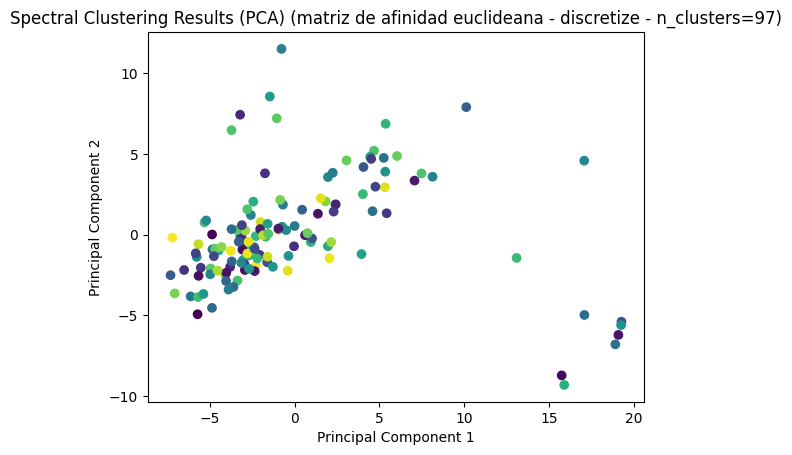

In [32]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labels2)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad euclideana - discretize - n_clusters=97)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels2)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad euclideana - discretize - n_clusters=97)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels2)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad euclideana - discretize - n_clusters=97)')
    plt.show()

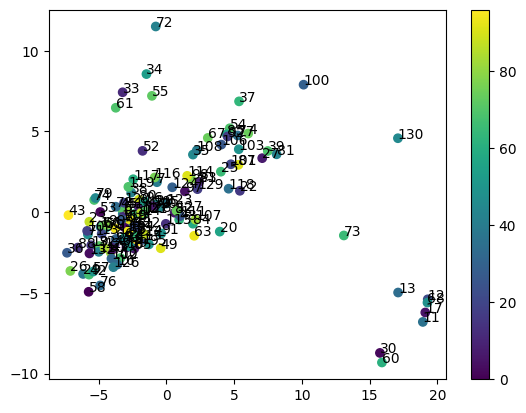

In [33]:
# X_pca[:, 0] son los valores en el eje x
# X_pca[:, 1] son los valores en el eje y
# labels1 son las etiquetas de los grupos

# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels2)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labels2):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [34]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, labels2)
silhouette_avg

-0.23521134675054212

In [35]:
# Calcular el índice de silueta para cada muestra

silhouette_values = silhouette_samples(data_processed, labels2)


# Calcular el índice de silueta individual promedio para cada clúster

cluster_indices = sorted(set(labels2))

for cluster_idx in cluster_indices:

    # Obtener las muestras pertenecientes al clúster actual

    cluster_samples = silhouette_values[labels2 == cluster_idx]

    cluster_avg_silhouette = cluster_samples.mean()

    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")


Índice de Silueta del Clúster 0: 0.0
Índice de Silueta del Clúster 1: 0.0
Índice de Silueta del Clúster 2: 0.0
Índice de Silueta del Clúster 3: -0.4028853400483385
Índice de Silueta del Clúster 4: -0.4998185049391856
Índice de Silueta del Clúster 5: 0.0
Índice de Silueta del Clúster 6: -0.4709903447765673
Índice de Silueta del Clúster 7: -0.5324072343067151
Índice de Silueta del Clúster 8: 0.0
Índice de Silueta del Clúster 9: 0.0
Índice de Silueta del Clúster 10: 0.0
Índice de Silueta del Clúster 11: 0.0
Índice de Silueta del Clúster 12: 0.0
Índice de Silueta del Clúster 13: -0.45988468283064987
Índice de Silueta del Clúster 14: 0.0
Índice de Silueta del Clúster 15: 0.0
Índice de Silueta del Clúster 16: -0.45034201386680933
Índice de Silueta del Clúster 17: -0.39363206840153375
Índice de Silueta del Clúster 18: 0.0
Índice de Silueta del Clúster 19: 0.0
Índice de Silueta del Clúster 20: 0.0
Índice de Silueta del Clúster 21: 0.0
Índice de Silueta del Clúster 22: 0.0
Índice de Silueta del

In [36]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering2.n_clusters):

    cluster_indices = np.where(labels2 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")


Cluster 1:
- Atributo n. 1: V_media (Media: 4.0)
- Atributo n. 2: SA_media (Media: 4.078125)
- Atributo n. 4: SP_media (Media: 2.41015625)
- Atributo n. 14: LS_media (Media: 4.3671875)
- Atributo n. 19: PS_media (Media: 4.549479166666667)
Cluster 2:
- Atributo n. 1: V_media (Media: 3.5)
- Atributo n. 4: SP_media (Media: 3.6666666666666665)
- Atributo n. 11: CJ_media (Media: -1.0)
- Atributo n. 2: SA_media (Media: 3.8333333333333335)
- Atributo n. 14: LS_media (Media: -1.0)
Cluster 3:
- Atributo n. 2: SA_media (Media: 3.6666666666666665)
- Atributo n. 4: SP_media (Media: 3.333333333333333)
- Atributo n. 7: CH_media (Media: -1.0)
- Atributo n. 3: SI_media (Media: 4.333333333333333)
- Atributo n. 14: LS_media (Media: -1.0)
Cluster 4:
- Atributo n. 1: V_media (Media: 4.666666666666666)
- Atributo n. 4: SP_media (Media: 3.5)
- Atributo n. 2: SA_media (Media: 5.0)
- Atributo n. 3: SI_media (Media: 4.833333333333334)
- Atributo n. 11: CJ_media (Media: -1.0)
Cluster 5:
- Atributo n. 1: V_media

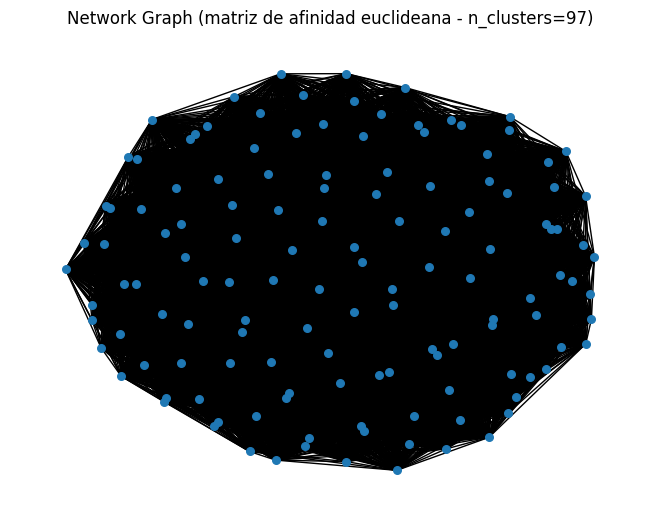

In [37]:
#Visualización de gráfico de red (Network graph)
#Esto puede revelar patrones de conectividad entre los clústeres
#NO DEPENDE DEL PARÁMETRO assign_labels

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo
for i in range(len(X)):
    G.add_node(i)

umbral = 97   #ajustar el valor de umbral para controlar la cantidad de conexiones en el gráfico de red

# Agregar aristas al grafo basadas en las conexiones entre las muestras
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if affinity_matrix_euclidean[i, j] < umbral:
            G.add_edge(i, j)

# Dibujar el grafo
nx.draw(G, with_labels=False, node_size=30)
plt.title('Network Graph (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

## A.1.3) Clustering3:  matriz de afinidad euclideana - discretize - n_clusters=27

In [38]:
n_clusters = 27    #número de clusters que se desea obtener; porque son 27 áreas
spectral_clustering3 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='discretize', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels3 = spectral_clustering3.fit_predict(affinity_matrix_euclidean)
labels3

array([22,  0,  0, 16,  1,  6, 13,  6, 23, 21, 17, 14, 19,  1, 10,  4,  5,
        3, 24, 25,  1, 16, 26, 15, 16, 26, 21,  1, 26, 25,  2,  0, 10,  1,
       26, 26, 12, 26, 16,  1,  0,  0,  7, 20, 21,  8, 13, 15, 23,  8,  0,
        5, 16, 11,  1,  1, 22,  6,  0,  8, 26, 26,  5, 21, 13, 23, 21, 26,
        9, 21,  6,  7, 26,  1, 13, 17, 12, 26, 18, 18,  0, 26, 26, 26,  6,
        1, 21, 16, 15, 18,  1, 16, 26,  0,  6,  4, 16, 26,  6,  8,  6,  6,
        7,  1, 23, 21,  6, 16, 26, 10, 21,  1,  8,  8, 26, 18,  4, 23,  1,
        1,  1, 13, 24, 16,  8,  4, 18, 20,  6, 26, 26,  4, 25])

In [ ]:
data_processed['Cluster']=labels3
data_processed

,V1,V2,V3,SA1,SA2,SA3,SI0,SI1,SI2,SP1,...,EQUIPO_rflidbinih,EDAD_ijawrgtfuz,EDAD_omygfsbzgq,EDAD_pqgwhrmfdu,EDAD_qmsudmubli,EDAD_vjekcogdhn,GENERO_Femenino,GENERO_Masculino,GENERO_No binario,Cluster
0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,...,0,0,0,1,0,0,0,1,0,12
1,4.0,5.0,3.0,5.0,5.0,5.0,4.0,5.0,6.0,2.0,...,0,0,0,1,0,0,0,1,0,17
2,5.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,3.0,...,0,0,1,0,0,0,1,0,0,23
3,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,...,0,0,0,1,0,0,0,1,0,17
4,2.0,2.0,2.0,1.0,1.0,1.0,4.0,5.0,5.0,1.0,...,0,0,0,1,0,0,0,1,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,4.0,4.0,4.0,5.0,4.0,5.0,2.0,4.0,4.0,2.0,...,0,0,0,0,1,0,0,0,0,23
129,2.0,3.0,4.0,5.0,4.0,4.0,3.0,6.0,4.0,1.0,...,0,0,0,0,1,0,0,0,0,11
130,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0,0,0,0,1,0,0,0,0,16
131,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,0,0,0,0,1,0,0,0,0,24


In [ ]:
data_processed.to_csv("spectralClusteringLabels3_data_cleaned.csv", sep=";", index=False)

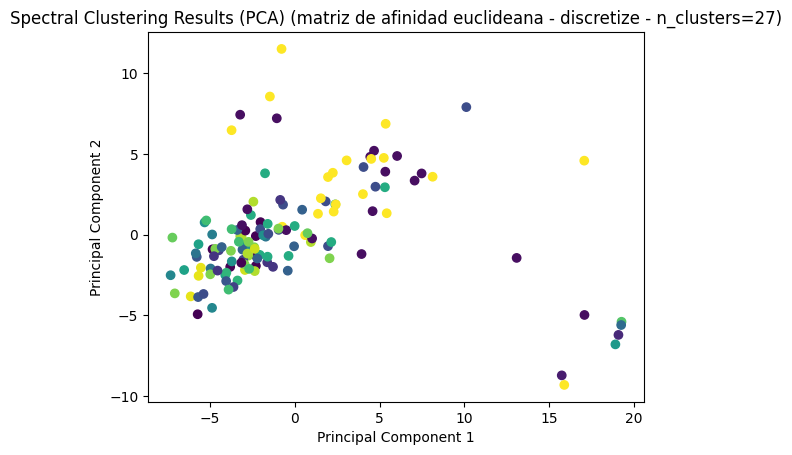

In [39]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labels3)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad euclideana - discretize - n_clusters=27)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels3)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad euclideana - discretize - n_clusters=27)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels3)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad euclideana - discretize - n_clusters=27)')
    plt.show()

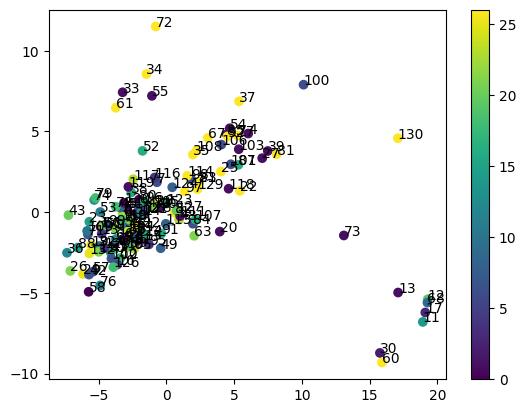

In [40]:
# X_pca[:, 0] son los valores en el eje x
# X_pca[:, 1] son los valores en el eje y
# labels1 son las etiquetas de los grupos

# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels3)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labels3):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [41]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, labels3)
silhouette_avg

-0.22216545699049198

In [42]:
# Calcular el índice de silueta para cada muestra

silhouette_values = silhouette_samples(data_processed, labels3)


# Calcular el índice de silueta individual promedio para cada clúster

cluster_indices = sorted(set(labels3))

for cluster_idx in cluster_indices:

    # Obtener las muestras pertenecientes al clúster actual

    cluster_samples = silhouette_values[labels3 == cluster_idx]

    cluster_avg_silhouette = cluster_samples.mean()

    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")

Índice de Silueta del Clúster 0: -0.22959991207237518
Índice de Silueta del Clúster 1: -0.2673428583610205
Índice de Silueta del Clúster 2: 0.0
Índice de Silueta del Clúster 3: 0.0
Índice de Silueta del Clúster 4: -0.24423457725027742
Índice de Silueta del Clúster 5: -0.3056990272705212
Índice de Silueta del Clúster 6: -0.23403386478880203
Índice de Silueta del Clúster 7: -0.18744619453115285
Índice de Silueta del Clúster 8: -0.2488237310999639
Índice de Silueta del Clúster 9: 0.0
Índice de Silueta del Clúster 10: -0.2969691274160496
Índice de Silueta del Clúster 11: 0.0
Índice de Silueta del Clúster 12: -0.14256627377190037
Índice de Silueta del Clúster 13: -0.28363657779773505
Índice de Silueta del Clúster 14: 0.0
Índice de Silueta del Clúster 15: -0.26779491172942865
Índice de Silueta del Clúster 16: -0.17528887198113016
Índice de Silueta del Clúster 17: 0.014989932624451772
Índice de Silueta del Clúster 18: -0.27904345034858835
Índice de Silueta del Clúster 19: 0.0
Índice de Siluet

In [43]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering3.n_clusters):

    cluster_indices = np.where(labels3 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")

Cluster 1:
- Atributo n. 1: V_media (Media: 4.0)
- Atributo n. 4: SP_media (Media: 2.41015625)
- Atributo n. 2: SA_media (Media: 4.078125)
- Atributo n. 3: SI_media (Media: 4.048177083333333)
- Atributo n. 11: CJ_media (Media: 2.8697916666666665)
Cluster 2:
- Atributo n. 1: V_media (Media: 3.5)
- Atributo n. 4: SP_media (Media: 3.6666666666666665)
- Atributo n. 11: CJ_media (Media: -1.0)
- Atributo n. 3: SI_media (Media: 5.0)
- Atributo n. 9: CB_media (Media: 4.333333333333333)
Cluster 3:
- Atributo n. 2: SA_media (Media: 3.6666666666666665)
- Atributo n. 4: SP_media (Media: 3.333333333333333)
- Atributo n. 7: CH_media (Media: -1.0)
- Atributo n. 3: SI_media (Media: 4.333333333333333)
- Atributo n. 14: LS_media (Media: -1.0)
Cluster 4:
- Atributo n. 2: SA_media (Media: 5.0)
- Atributo n. 3: SI_media (Media: 4.833333333333334)
- Atributo n. 1: V_media (Media: 4.666666666666666)
- Atributo n. 14: LS_media (Media: -1.0)
- Atributo n. 11: CJ_media (Media: -1.0)
Cluster 5:
- Atributo n. 1: 

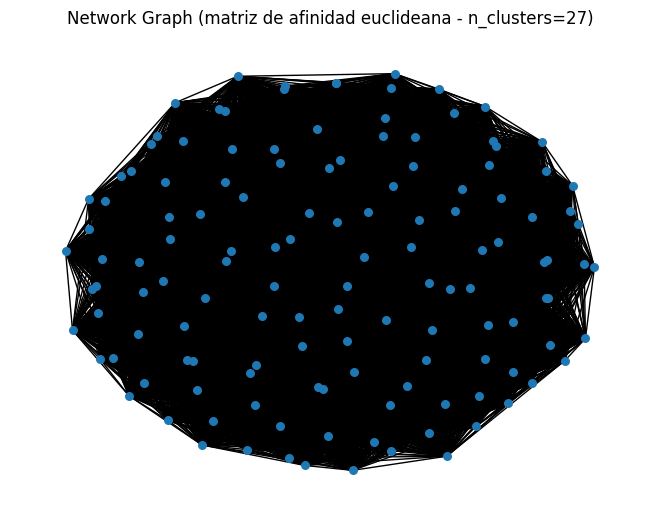

In [44]:
#Visualización de gráfico de red (Network graph)
#Esto puede revelar patrones de conectividad entre los clústeres
#NO DEPENDE DEL PARÁMETRO assign_labels

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo
for i in range(len(X)):
    G.add_node(i)

umbral = 97   #ajustar el valor de umbral para controlar la cantidad de conexiones en el gráfico de red

# Agregar aristas al grafo basadas en las conexiones entre las muestras
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if affinity_matrix_euclidean[i, j] < umbral:
            G.add_edge(i, j)

# Dibujar el grafo
nx.draw(G, with_labels=False, node_size=30)
plt.title('Network Graph (matriz de afinidad euclideana - n_clusters=27)')
plt.show()

## A.2) matriz de afinidad=distancia euclidiana y assign_labels=kmeans

## A.2.1) Clustering4:  matriz de afinidad euclideana - kmeans - n_clusters=4

In [45]:
n_clusters = 4    #número de clusters que se desea obtener
spectral_clustering4 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels4 = spectral_clustering4.fit_predict(affinity_matrix_euclidean)
labels4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

In [ ]:
data_processed['Cluster']=labels4
data_processed

In [ ]:
data_processed.to_csv("spectralClusteringLabels4_data_cleaned.csv", sep=";", index=False)

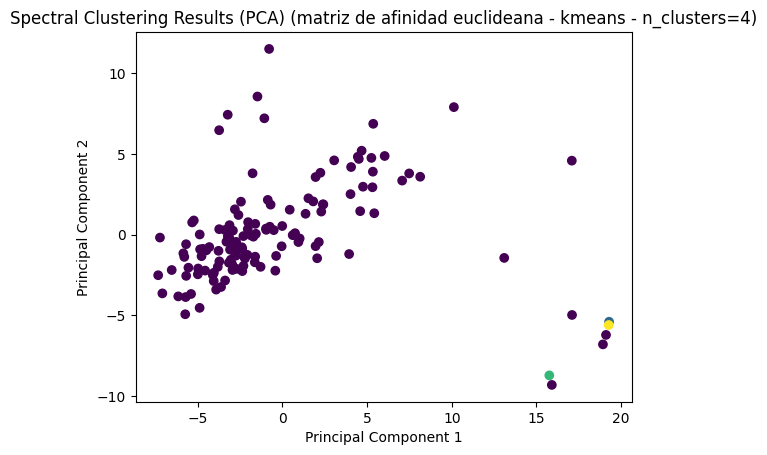

In [46]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labels4)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad euclideana - kmeans - n_clusters=4)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels4)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad euclideana - kmeans - n_clusters=4)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels4)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad euclideana - kmeans - n_clusters=4)')
    plt.show()

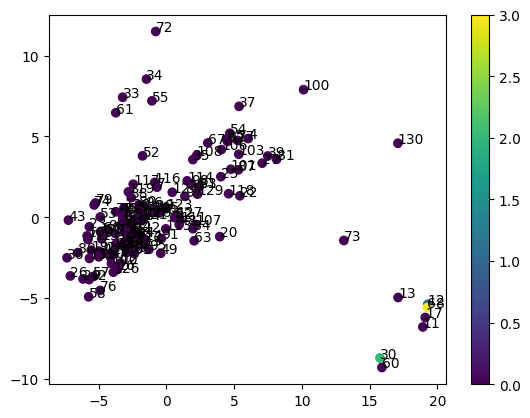

In [47]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels4)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labels4):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [48]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, labels4)
silhouette_avg

0.47623623030657247

In [49]:
# Calcular el índice de silueta para cada muestra

silhouette_values = silhouette_samples(data_processed, labels4)


# Calcular el índice de silueta individual promedio para cada clúster

cluster_indices = sorted(set(labels4))

for cluster_idx in cluster_indices:

    # Obtener las muestras pertenecientes al clúster actual

    cluster_samples = silhouette_values[labels4 == cluster_idx]

    cluster_avg_silhouette = cluster_samples.mean()

    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")

Índice de Silueta del Clúster 0: 0.4872262971598011
Índice de Silueta del Clúster 1: 0.0
Índice de Silueta del Clúster 2: 0.0
Índice de Silueta del Clúster 3: 0.0


In [50]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering4.n_clusters):

    cluster_indices = np.where(labels4 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")

Cluster 1:
- Atributo n. 1: V_media (Media: 4.0)
- Atributo n. 4: SP_media (Media: 2.41015625)
- Atributo n. 2: SA_media (Media: 4.078125)
- Atributo n. 3: SI_media (Media: 4.048177083333333)
- Atributo n. 11: CJ_media (Media: 2.8697916666666665)
Cluster 2:
- Atributo n. 2: SA_media (Media: 3.8333333333333335)
- Atributo n. 3: SI_media (Media: 5.0)
- Atributo n. 11: CJ_media (Media: -1.0)
- Atributo n. 1: V_media (Media: 3.5)
- Atributo n. 12: CC_media (Media: -1.0)
Cluster 3:
- Atributo n. 2: SA_media (Media: 3.6666666666666665)
- Atributo n. 4: SP_media (Media: 3.333333333333333)
- Atributo n. 7: CH_media (Media: -1.0)
- Atributo n. 3: SI_media (Media: 4.333333333333333)
- Atributo n. 14: LS_media (Media: -1.0)
Cluster 4:
- Atributo n. 2: SA_media (Media: 5.0)
- Atributo n. 3: SI_media (Media: 4.833333333333334)
- Atributo n. 1: V_media (Media: 4.666666666666666)
- Atributo n. 11: CJ_media (Media: -1.0)
- Atributo n. 15: LA_media (Media: -1.0)


## A.2.2) Clustering5:  matriz de afinidad euclideana - kmeans - n_clusters=97

In [51]:
n_clusters = 97    #número de clusters que se desea obtener; porque son 97 preguntas
spectral_clustering5 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels5 = spectral_clustering5.fit_predict(affinity_matrix_euclidean)
labels5

array([12, 46, 33, 29, 29,  6, 78, 29, 49, 37, 28, 29, 29, 29, 69, 27, 76,
       29, 22, 50, 29, 93, 29, 29, 43, 81, 89, 29, 68, 14, 29, 84, 16, 29,
       29, 95, 41,  3, 62,  2, 20, 77, 72, 85, 65, 82, 56, 71, 19,  1,  5,
       25, 29,  8,  2,  2, 60, 53,  0, 31, 29, 29, 30, 79, 26, 74, 54, 29,
       29, 17, 45, 35, 29, 29, 70, 57, 90, 29, 47, 59, 38, 55, 61, 36, 88,
       92, 10, 29, 75, 32,  9, 48, 94, 40,  7, 13, 23, 29, 86, 80,  2, 96,
        4, 29, 73, 87, 66, 29,  3, 51, 91, 64, 29, 34, 29, 15, 42, 83,  2,
        3, 11, 63, 24, 44, 29, 21, 18, 39, 52, 29, 29, 58, 67],
      dtype=int32)

In [ ]:
data_processed['Cluster']=labels5
data_processed

In [ ]:
data_processed.to_csv("spectralClusteringLabels5_data_cleaned.csv", sep=";", index=False)

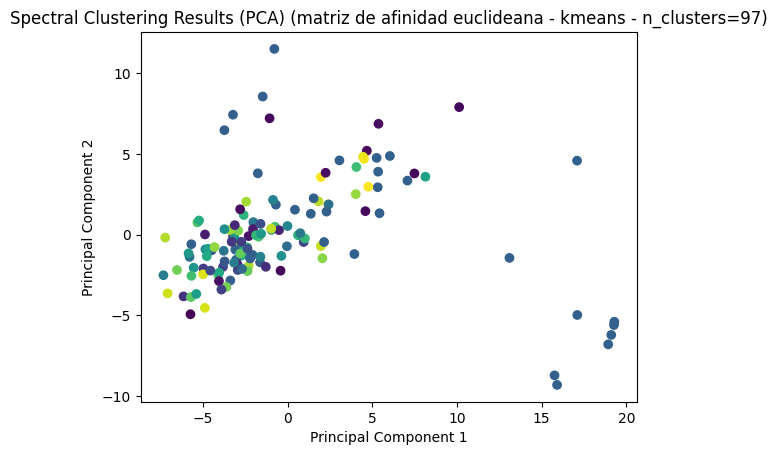

In [52]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labels5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad euclideana - kmeans - n_clusters=97)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels5)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad euclideana - kmeans - n_clusters=97)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad euclideana - kmeans - n_clusters=97)')
    plt.show()

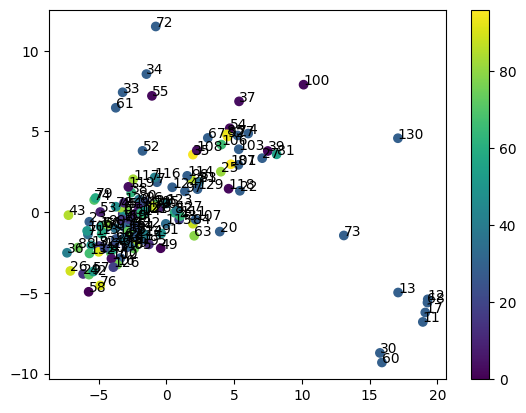

In [53]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels5)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labels5):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [54]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, labels5)
silhouette_avg

-0.11776599389558724

In [55]:
# Calcular el índice de silueta para cada muestra

silhouette_values = silhouette_samples(data_processed, labels5)


# Calcular el índice de silueta individual promedio para cada clúster

cluster_indices = sorted(set(labels5))

for cluster_idx in cluster_indices:

    # Obtener las muestras pertenecientes al clúster actual

    cluster_samples = silhouette_values[labels5 == cluster_idx]

    cluster_avg_silhouette = cluster_samples.mean()

    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")

Índice de Silueta del Clúster 0: 0.0
Índice de Silueta del Clúster 1: 0.0
Índice de Silueta del Clúster 2: -0.3502356926534675
Índice de Silueta del Clúster 3: -0.41856403016951016
Índice de Silueta del Clúster 4: 0.0
Índice de Silueta del Clúster 5: 0.0
Índice de Silueta del Clúster 6: 0.0
Índice de Silueta del Clúster 7: 0.0
Índice de Silueta del Clúster 8: 0.0
Índice de Silueta del Clúster 9: 0.0
Índice de Silueta del Clúster 10: 0.0
Índice de Silueta del Clúster 11: 0.0
Índice de Silueta del Clúster 12: 0.0
Índice de Silueta del Clúster 13: 0.0
Índice de Silueta del Clúster 14: 0.0
Índice de Silueta del Clúster 15: 0.0
Índice de Silueta del Clúster 16: 0.0
Índice de Silueta del Clúster 17: 0.0
Índice de Silueta del Clúster 18: 0.0
Índice de Silueta del Clúster 19: 0.0
Índice de Silueta del Clúster 20: 0.0
Índice de Silueta del Clúster 21: 0.0
Índice de Silueta del Clúster 22: 0.0
Índice de Silueta del Clúster 23: 0.0
Índice de Silueta del Clúster 24: 0.0
Índice de Silueta del Clúst

In [56]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering5.n_clusters):

    cluster_indices = np.where(labels5 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")

Cluster 1:
- Atributo n. 1: V_media (Media: 4.0)
- Atributo n. 2: SA_media (Media: 4.078125)
- Atributo n. 4: SP_media (Media: 2.41015625)
- Atributo n. 14: LS_media (Media: 4.3671875)
- Atributo n. 19: PS_media (Media: 4.549479166666667)
Cluster 2:
- Atributo n. 1: V_media (Media: 3.5)
- Atributo n. 4: SP_media (Media: 3.6666666666666665)
- Atributo n. 2: SA_media (Media: 3.8333333333333335)
- Atributo n. 5: SF_media (Media: 4.333333333333333)
- Atributo n. 8: CE_media (Media: 3.1666666666666665)
Cluster 3:
- Atributo n. 1: V_media (Media: 3.6666666666666665)
- Atributo n. 4: SP_media (Media: 3.333333333333333)
- Atributo n. 2: SA_media (Media: 3.6666666666666665)
- Atributo n. 11: CJ_media (Media: -1.0)
- Atributo n. 8: CE_media (Media: -1.0)
Cluster 4:
- Atributo n. 1: V_media (Media: 4.666666666666666)
- Atributo n. 4: SP_media (Media: 3.5)
- Atributo n. 8: CE_media (Media: -1.0)
- Atributo n. 10: CD_media (Media: -1.0)
- Atributo n. 2: SA_media (Media: 5.0)
Cluster 5:
- Atributo n

## A.2.3) Clustering6: matriz de afinidad euclideana - kmeans - n_clusters=27

In [57]:
n_clusters = 27    #número de clusters que se desea obtener; porque son 97 preguntas
spectral_clustering6 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels6 = spectral_clustering6.fit_predict(affinity_matrix_euclidean)
labels6

array([22,  3,  3, 13,  5,  3, 16, 13, 14,  1, 12,  5,  0,  3,  5,  3, 13,
        5,  5,  3, 13, 13, 13, 13, 13, 13,  1,  5, 13,  5, 13,  3, 13,  5,
       13, 13,  4, 13, 13,  5, 10,  3, 23,  5,  5, 13,  5, 13, 13, 13,  3,
        5, 13,  7,  5, 13,  1,  3,  3,  5, 13, 13,  9,  5, 17,  5,  1, 13,
       13, 21,  3,  8, 13, 13,  5,  5, 13, 13,  3,  5,  3, 13, 13, 13,  3,
        5,  5, 13, 26,  5,  5,  5, 13,  3,  1, 13,  5, 13, 13, 24, 13,  3,
       20, 13,  6,  5,  3,  5, 13, 15,  1,  5, 13, 18, 13,  2,  3,  5,  5,
       13,  5, 13, 19, 11, 13, 13,  5,  5,  3, 13, 13, 13, 25],
      dtype=int32)

In [ ]:
data_processed['Cluster']=labels6
data_processed

In [ ]:
data_processed.to_csv("spectralClusteringLabels6_data_cleaned.csv", sep=";", index=False)

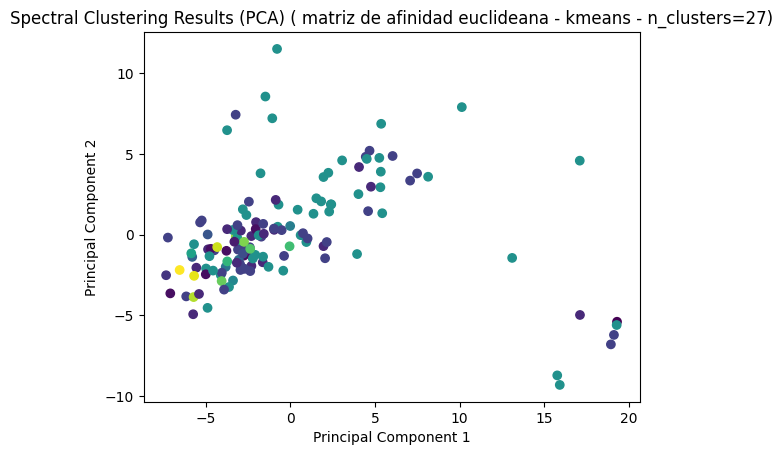

In [58]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labels6)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad euclideana - kmeans - n_clusters=27)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels6)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results ( matriz de afinidad euclideana - kmeans - n_clusters=27)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels6)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) ( matriz de afinidad euclideana - kmeans - n_clusters=27)')
    plt.show()

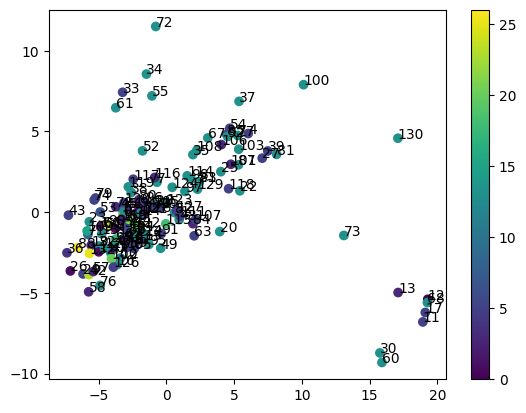

In [59]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels6)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labels6):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [60]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, labels6)
silhouette_avg

-0.35499125104686846

In [61]:
# Calcular el índice de silueta para cada muestra

silhouette_values = silhouette_samples(data_processed, labels6)


# Calcular el índice de silueta individual promedio para cada clúster

cluster_indices = sorted(set(labels6))

for cluster_idx in cluster_indices:

    # Obtener las muestras pertenecientes al clúster actual

    cluster_samples = silhouette_values[labels6 == cluster_idx]

    cluster_avg_silhouette = cluster_samples.mean()

    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")

Índice de Silueta del Clúster 0: 0.0
Índice de Silueta del Clúster 1: -0.38859327603919774
Índice de Silueta del Clúster 2: 0.0
Índice de Silueta del Clúster 3: -0.4327647638026142
Índice de Silueta del Clúster 4: 0.0
Índice de Silueta del Clúster 5: -0.4749876394930505
Índice de Silueta del Clúster 6: 0.0
Índice de Silueta del Clúster 7: 0.0
Índice de Silueta del Clúster 8: 0.0
Índice de Silueta del Clúster 9: 0.0
Índice de Silueta del Clúster 10: 0.0
Índice de Silueta del Clúster 11: 0.0
Índice de Silueta del Clúster 12: 0.0
Índice de Silueta del Clúster 13: -0.4015480342836463
Índice de Silueta del Clúster 14: 0.0
Índice de Silueta del Clúster 15: 0.0
Índice de Silueta del Clúster 16: 0.0
Índice de Silueta del Clúster 17: 0.0
Índice de Silueta del Clúster 18: 0.0
Índice de Silueta del Clúster 19: 0.0
Índice de Silueta del Clúster 20: 0.0
Índice de Silueta del Clúster 21: 0.0
Índice de Silueta del Clúster 22: 0.0
Índice de Silueta del Clúster 23: 0.0
Índice de Silueta del Clúster 24:

In [62]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering6.n_clusters):

    cluster_indices = np.where(labels6 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")

Cluster 1:
- Atributo n. 2: SA_media (Media: 4.078125)
- Atributo n. 3: SI_media (Media: 4.048177083333333)
- Atributo n. 11: CJ_media (Media: 2.8697916666666665)
- Atributo n. 1: V_media (Media: 4.0)
- Atributo n. 12: CC_media (Media: 4.580729166666666)
Cluster 2:
- Atributo n. 1: V_media (Media: 3.5)
- Atributo n. 4: SP_media (Media: 3.6666666666666665)
- Atributo n. 2: SA_media (Media: 3.8333333333333335)
- Atributo n. 11: CJ_media (Media: -1.0)
- Atributo n. 3: SI_media (Media: 5.0)
Cluster 3:
- Atributo n. 1: V_media (Media: 3.6666666666666665)
- Atributo n. 4: SP_media (Media: 3.333333333333333)
- Atributo n. 2: SA_media (Media: 3.6666666666666665)
- Atributo n. 3: SI_media (Media: 4.333333333333333)
- Atributo n. 11: CJ_media (Media: -1.0)
Cluster 4:
- Atributo n. 1: V_media (Media: 4.666666666666666)
- Atributo n. 4: SP_media (Media: 3.5)
- Atributo n. 2: SA_media (Media: 5.0)
- Atributo n. 11: CJ_media (Media: -1.0)
- Atributo n. 3: SI_media (Media: 4.833333333333334)
Cluster 

# B) Aplicar el algoritmo de clustering espectral calculando la matriz de afinidad utilizando RBF

In [63]:
affinity_matrix_rbf = rbf_kernel(X, gamma=0.1)  #se recomienda probar diferentes valores de gamma en un rango amplio, como [0.001, 0.01, 0.1, 1, 10]

# B.1)  matriz de afinidad=RBF y assign_labels=discretize

## B.1.1) Clustering7: matriz de afinidad RBF - discretize - n_clusters=4

In [64]:
n_clusters = 4
spectral_clustering7 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='discretize', random_state=42)
labelsRBF_7 = spectral_clustering7.fit_predict(affinity_matrix_rbf)
labelsRBF_7

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0])

In [ ]:
data_processed['Cluster']=labelsRBF_7
data_processed

In [ ]:
data_processed.to_csv("spectralClusteringLabels7_data_cleaned.csv", sep=";", index=False)

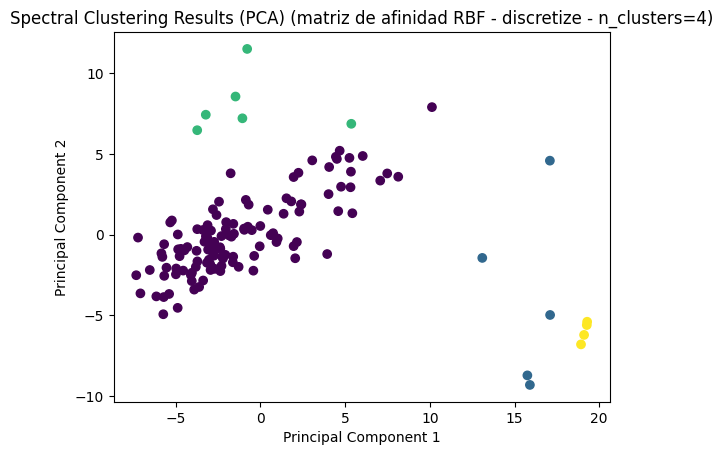

In [65]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_7)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad RBF - discretize - n_clusters=4)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_7)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - discretize - n_clusters=4)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_7)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - discretize - n_clusters=4)')
#Visualización de gráfico de red (Network graph)
#Esto puede revelar patrones de conectividad entre los clústeres
#NO DEPENDE DEL PARÁMETRO assign_labels    plt.show()

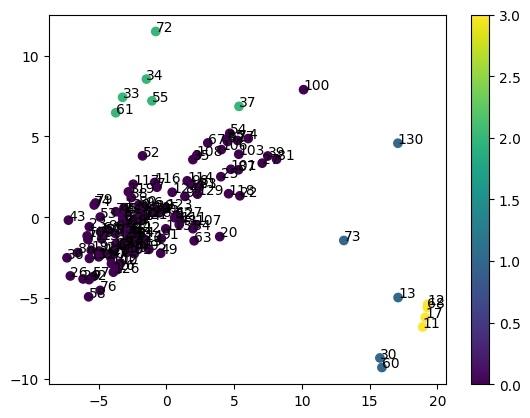

In [66]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_7)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_7):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [67]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, labelsRBF_7)
silhouette_avg

0.39413800458247455

In [68]:
# Calcular el índice de silueta para cada muestra

silhouette_values = silhouette_samples(data_processed, labelsRBF_7)


# Calcular el índice de silueta individual promedio para cada clúster

cluster_indices = sorted(set(labelsRBF_7))

for cluster_idx in cluster_indices:

    # Obtener las muestras pertenecientes al clúster actual

    cluster_samples = silhouette_values[labelsRBF_7 == cluster_idx]

    cluster_avg_silhouette = cluster_samples.mean()

    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")

Índice de Silueta del Clúster 0: 0.4029415986941669
Índice de Silueta del Clúster 1: 0.14198913177046488
Índice de Silueta del Clúster 2: 0.18004985449260658
Índice de Silueta del Clúster 3: 0.7707502944373661


In [69]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering7.n_clusters):

    cluster_indices = np.where(labelsRBF_7 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")

Cluster 1:
- Atributo n. 1: V_media (Media: 4.0)
- Atributo n. 4: SP_media (Media: 2.41015625)
- Atributo n. 2: SA_media (Media: 4.078125)
- Atributo n. 3: SI_media (Media: 4.048177083333333)
- Atributo n. 11: CJ_media (Media: 2.8697916666666665)
Cluster 2:
- Atributo n. 4: SP_media (Media: 3.6666666666666665)
- Atributo n. 2: SA_media (Media: 3.8333333333333335)
- Atributo n. 3: SI_media (Media: 5.0)
- Atributo n. 5: SF_media (Media: 4.333333333333333)
- Atributo n. 11: CJ_media (Media: -1.0)
Cluster 3:
- Atributo n. 1: V_media (Media: 3.6666666666666665)
- Atributo n. 2: SA_media (Media: 3.6666666666666665)
- Atributo n. 3: SI_media (Media: 4.333333333333333)
- Atributo n. 4: SP_media (Media: 3.333333333333333)
- Atributo n. 5: SF_media (Media: 4.0)
Cluster 4:
- Atributo n. 2: SA_media (Media: 5.0)
- Atributo n. 3: SI_media (Media: 4.833333333333334)
- Atributo n. 1: V_media (Media: 4.666666666666666)
- Atributo n. 11: CJ_media (Media: -1.0)
- Atributo n. 14: LS_media (Media: -1.0)


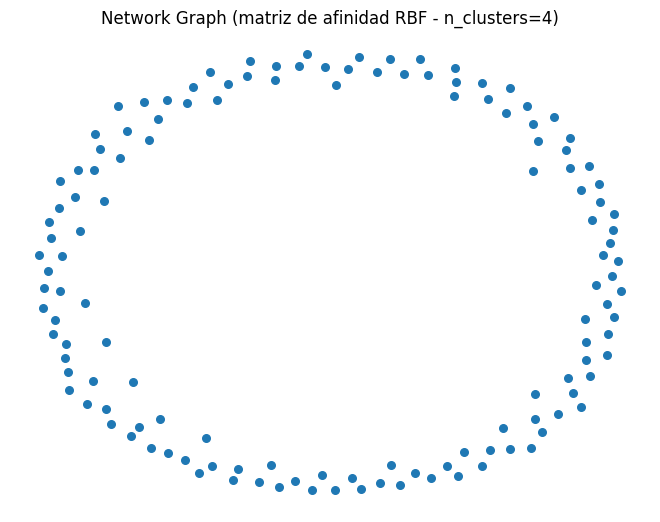

In [70]:
#Visualización de gráfico de red (Network graph)
#Esto puede revelar patrones de conectividad entre los clústeres
#NO DEPENDE DEL PARÁMETRO assign_labels

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo
for i in range(len(X)):
    G.add_node(i)

umbral = 4

# Agregar aristas al grafo basadas en las conexiones entre las muestras
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if affinity_matrix_rbf[i, j] > umbral:
            G.add_edge(i, j)

# Dibujar el grafo
nx.draw(G, with_labels=False, node_size=30)
plt.title('Network Graph (matriz de afinidad RBF - n_clusters=4)')
plt.show()


## B.1.2) Clustering8: matriz de afinidad RBF - discretize - n_clusters=97

In [71]:
n_clusters = 97
spectral_clustering8 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='discretize', random_state=42)
labelsRBF_8 = spectral_clustering8.fit_predict(affinity_matrix_rbf)
labelsRBF_8

array([ 4, 18, 45, 78, 53,  1, 45, 21, 45, 45, 85, 14, 14,  3, 51, 38, 85,
       14, 34, 34,  9, 31, 30, 38, 51, 19, 61, 19,  1, 35,  3, 51, 61,  7,
        7, 95, 35, 11,  4, 11, 18, 38, 35, 18, 51, 60, 38, 60, 30, 13,  5,
       60, 10, 34, 17,  7, 38, 35,  0, 38,  3,  7, 34, 56, 34, 38, 60, 10,
       14, 34,  1, 35, 12,  8, 64, 85, 61, 53, 23, 16,  5, 53,  1,  1, 56,
       17, 51, 19, 61, 34, 40, 22, 17, 34,  5, 38, 21, 22, 31, 61,  6, 53,
       85,  2, 22, 40, 17, 56, 31, 35, 18, 56, 27, 22, 73,  4, 10, 78, 15,
       44, 23,  5, 38,  1, 31, 85, 85, 56, 34, 95,  8, 38, 35])

In [ ]:
data_processed['Cluster']=labelsRBF_8
data_processed

In [ ]:
data_processed.to_csv("spectralClusteringLabels8_data_cleaned.csv", sep=";", index=False)

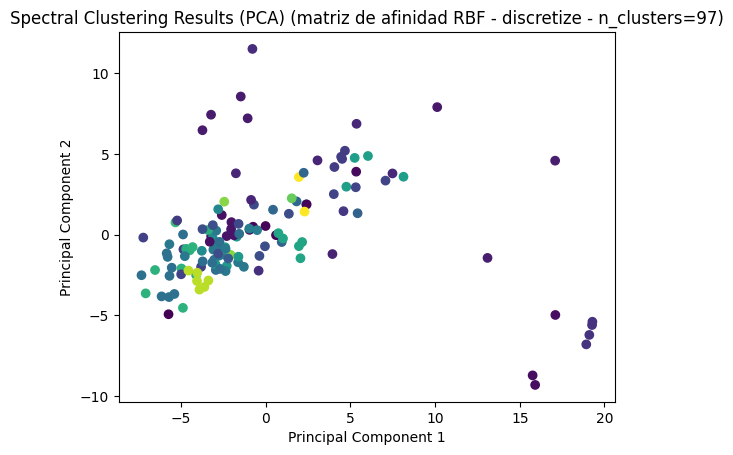

In [72]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_8)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results ( matriz de afinidad RBF - discretize - n_clusters=97)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_8)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - discretize - n_clusters=97)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_8)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - discretize - n_clusters=97)')
    plt.show()

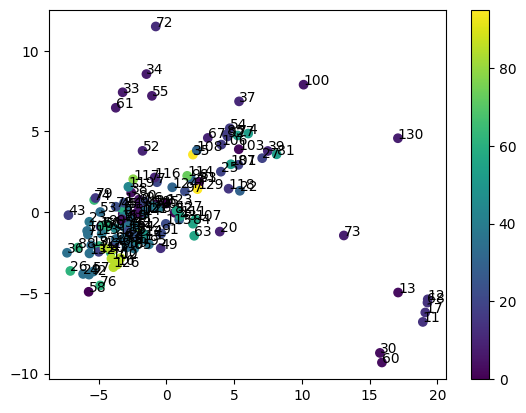

In [73]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_8)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_8):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [74]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, labelsRBF_8)
silhouette_avg

0.03545561441989845

In [75]:
# Calcular el índice de silueta para cada muestra

silhouette_values = silhouette_samples(data_processed, labelsRBF_8)


# Calcular el índice de silueta individual promedio para cada clúster

cluster_indices = sorted(set(labelsRBF_8))

for cluster_idx in cluster_indices:

    # Obtener las muestras pertenecientes al clúster actual

    cluster_samples = silhouette_values[labelsRBF_8 == cluster_idx]

    cluster_avg_silhouette = cluster_samples.mean()

    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")

Índice de Silueta del Clúster 0: 0.0
Índice de Silueta del Clúster 1: 0.05813000427820416
Índice de Silueta del Clúster 2: 0.0
Índice de Silueta del Clúster 3: 0.5070470307144469
Índice de Silueta del Clúster 4: 0.05863138229855455
Índice de Silueta del Clúster 5: -0.06336017724417597
Índice de Silueta del Clúster 6: 0.0
Índice de Silueta del Clúster 7: 0.26122181090319735
Índice de Silueta del Clúster 8: 0.03805689089744213
Índice de Silueta del Clúster 9: 0.0
Índice de Silueta del Clúster 10: -0.056496558156369676
Índice de Silueta del Clúster 11: -0.19122729133783128
Índice de Silueta del Clúster 12: 0.0
Índice de Silueta del Clúster 13: 0.0
Índice de Silueta del Clúster 14: 0.7188601257873226
Índice de Silueta del Clúster 15: 0.0
Índice de Silueta del Clúster 16: 0.0
Índice de Silueta del Clúster 17: 0.0979595506157335
Índice de Silueta del Clúster 18: -0.07974512777954441
Índice de Silueta del Clúster 19: -0.04470882548309702
Índice de Silueta del Clúster 21: -0.1358143766678413
Í

In [76]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering8.n_clusters):

    cluster_indices = np.where(labelsRBF_8 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")

Cluster 1:
- Atributo n. 1: V_media (Media: 4.0)
- Atributo n. 2: SA_media (Media: 4.078125)
- Atributo n. 4: SP_media (Media: 2.41015625)
- Atributo n. 14: LS_media (Media: 4.3671875)
- Atributo n. 19: PS_media (Media: 4.549479166666667)
Cluster 2:
- Atributo n. 1: V_media (Media: 3.5)
- Atributo n. 4: SP_media (Media: 3.6666666666666665)
- Atributo n. 3: SI_media (Media: 5.0)
- Atributo n. 2: SA_media (Media: 3.8333333333333335)
- Atributo n. 11: CJ_media (Media: -1.0)
Cluster 3:
- Atributo n. 1: V_media (Media: 3.6666666666666665)
- Atributo n. 4: SP_media (Media: 3.333333333333333)
- Atributo n. 3: SI_media (Media: 4.333333333333333)
- Atributo n. 8: CE_media (Media: -1.0)
- Atributo n. 5: SF_media (Media: 4.0)
Cluster 4:
- Atributo n. 2: SA_media (Media: 5.0)
- Atributo n. 4: SP_media (Media: 3.5)
- Atributo n. 7: CH_media (Media: -1.0)
- Atributo n. 3: SI_media (Media: 4.833333333333334)
- Atributo n. 5: SF_media (Media: 4.0)
Cluster 5:
- Atributo n. 1: V_media (Media: nan)
- Atr

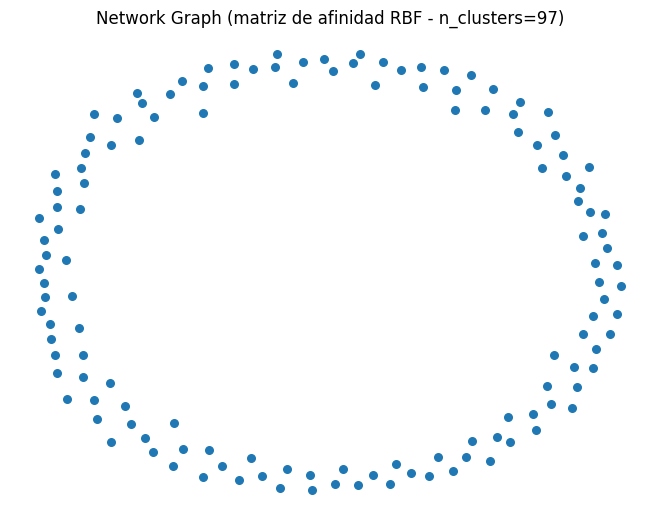

In [77]:
# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo
for i in range(len(X)):
    G.add_node(i)

umbral = 97

# Agregar aristas al grafo basadas en las conexiones entre las muestras
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if affinity_matrix_rbf[i, j] > umbral:
            G.add_edge(i, j)

# Dibujar el grafo
nx.draw(G, with_labels=False, node_size=30)
plt.title('Network Graph (matriz de afinidad RBF - n_clusters=97)')
plt.show()

## B.1.3) Clustering9: matriz de afinidad RBF - discretize - n_clusters=27

In [78]:
n_clusters = 27
spectral_clustering9 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='discretize', random_state=42)
labelsRBF_9 = spectral_clustering9.fit_predict(affinity_matrix_rbf)
labelsRBF_9

array([ 5, 12, 19, 12, 11,  8, 19, 17, 19, 19, 12,  9,  9,  4,  1,  5, 12,
        9, 24, 24, 26,  3,  2,  5,  1, 20,  0,  6, 23,  0,  4,  1,  5,  7,
        7,  6,  0, 14,  5, 14,  5,  5,  0,  5,  5,  1,  5, 24,  2, 18, 19,
       24, 23, 24, 13,  7, 18,  0,  0, 12,  4,  7, 24,  2, 24,  5, 24,  6,
        9, 24, 10, 24,  7, 15, 19, 12,  0, 21, 24,  5, 19, 11, 10, 20,  8,
       13,  1,  6,  0, 18, 18, 18, 13, 24, 17, 18, 10,  2, 26, 18, 21, 21,
       12, 21, 18, 18, 13,  8, 26, 24, 12,  8, 12, 18, 26, 18, 23, 23, 20,
       17, 19, 17, 12, 10,  3, 12,  0,  8,  1,  3, 15,  5,  0])

In [ ]:
data_processed['Cluster']=labelsRBF_9
data_processed

In [ ]:
data_processed.to_csv("spectralClusteringLabels9_data_cleaned.csv", sep=";", index=False)

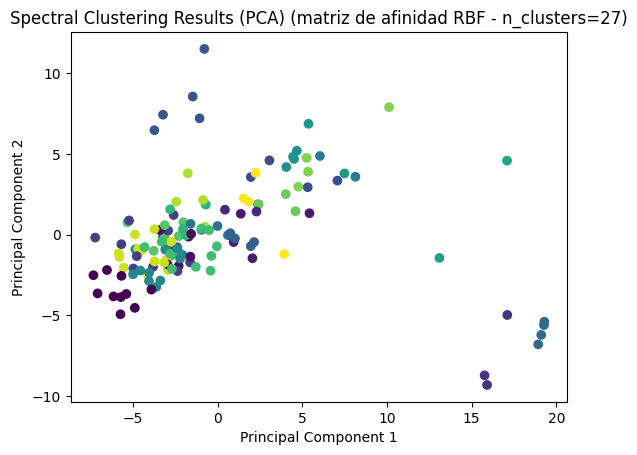

In [79]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_9)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results ( matriz de afinidad RBF - n_clusters=27)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_9)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - discretize - n_clusters=27)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_9)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - n_clusters=27)')
    plt.show()

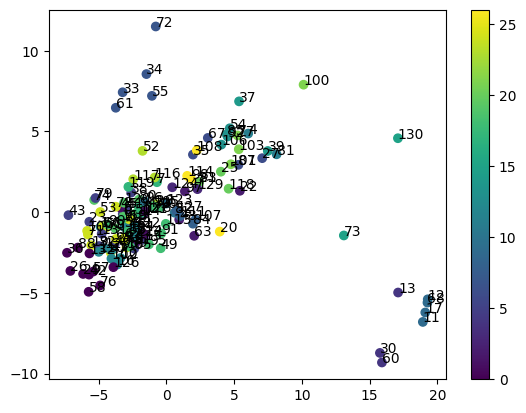

In [80]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_9)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_9):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [81]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, labelsRBF_9)
silhouette_avg

0.08125442253914786

In [82]:
# Calcular el índice de silueta para cada muestra

silhouette_values = silhouette_samples(data_processed, labelsRBF_9)


# Calcular el índice de silueta individual promedio para cada clúster

cluster_indices = sorted(set(labelsRBF_9))

for cluster_idx in cluster_indices:

    # Obtener las muestras pertenecientes al clúster actual

    cluster_samples = silhouette_values[labelsRBF_9 == cluster_idx]

    cluster_avg_silhouette = cluster_samples.mean()

    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")

Índice de Silueta del Clúster 0: 0.1365058907617873
Índice de Silueta del Clúster 1: -0.00432934730046836
Índice de Silueta del Clúster 2: 0.009856995910088377
Índice de Silueta del Clúster 3: -0.01349863533330279
Índice de Silueta del Clúster 4: 0.5070470307144469
Índice de Silueta del Clúster 5: -0.0016239131386769185
Índice de Silueta del Clúster 6: -0.06883354087720192
Índice de Silueta del Clúster 7: 0.13965094849026477
Índice de Silueta del Clúster 8: 0.0949663020626887
Índice de Silueta del Clúster 9: 0.7188601257873226
Índice de Silueta del Clúster 10: 0.21985644018599695
Índice de Silueta del Clúster 11: 0.18652781666125653
Índice de Silueta del Clúster 12: 0.05102842220827517
Índice de Silueta del Clúster 13: 0.11887497519033284
Índice de Silueta del Clúster 14: -0.16343193426607583
Índice de Silueta del Clúster 15: 0.10471881079484023
Índice de Silueta del Clúster 17: -0.10249142653019726
Índice de Silueta del Clúster 18: 0.014934390111822425
Índice de Silueta del Clúster 19

In [83]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering9.n_clusters):

    cluster_indices = np.where(labelsRBF_9 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")

Cluster 1:
- Atributo n. 1: V_media (Media: 4.0)
- Atributo n. 2: SA_media (Media: 4.078125)
- Atributo n. 4: SP_media (Media: 2.41015625)
- Atributo n. 11: CJ_media (Media: 2.8697916666666665)
- Atributo n. 14: LS_media (Media: 4.3671875)
Cluster 2:
- Atributo n. 1: V_media (Media: 3.5)
- Atributo n. 4: SP_media (Media: 3.6666666666666665)
- Atributo n. 2: SA_media (Media: 3.8333333333333335)
- Atributo n. 9: CB_media (Media: 4.333333333333333)
- Atributo n. 6: CL_media (Media: 3.333333333333333)
Cluster 3:
- Atributo n. 1: V_media (Media: 3.6666666666666665)
- Atributo n. 4: SP_media (Media: 3.333333333333333)
- Atributo n. 2: SA_media (Media: 3.6666666666666665)
- Atributo n. 11: CJ_media (Media: -1.0)
- Atributo n. 14: LS_media (Media: -1.0)
Cluster 4:
- Atributo n. 1: V_media (Media: 4.666666666666666)
- Atributo n. 4: SP_media (Media: 3.5)
- Atributo n. 3: SI_media (Media: 4.833333333333334)
- Atributo n. 9: CB_media (Media: -1.0)
- Atributo n. 15: LA_media (Media: -1.0)
Cluster 

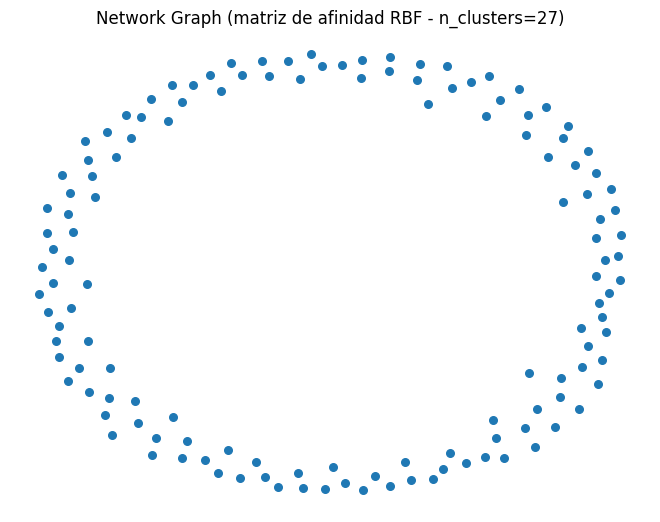

In [84]:
# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo
for i in range(len(X)):
    G.add_node(i)

umbral = 27

# Agregar aristas al grafo basadas en las conexiones entre las muestras
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if affinity_matrix_rbf[i, j] > umbral:
            G.add_edge(i, j)

# Dibujar el grafo
nx.draw(G, with_labels=False, node_size=30)
plt.title('Network Graph (matriz de afinidad RBF - n_clusters=27)')
plt.show()

# B.2)  matriz de afinidad=RBF y assign_labels=kmeans

## B.2.1) Clustering10: matriz de afinidad RBF - kmeans - n_clusters=4

In [85]:
n_clusters = 4
spectral_clustering10 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)
labelsRBF_10 = spectral_clustering10.fit_predict(affinity_matrix_rbf)
labelsRBF_10

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 2, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0], dtype=int32)

In [ ]:
data_processed['Cluster']=labelsRBF_10
data_processed

In [ ]:
data_processed.to_csv("spectralClusteringLabels10_data_cleaned.csv", sep=";", index=False)

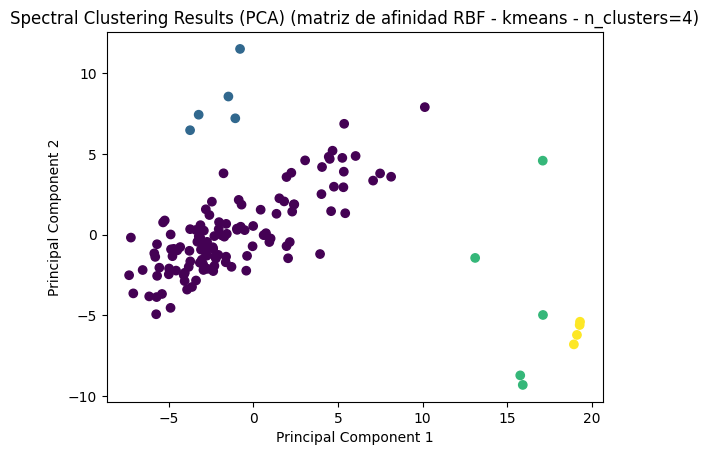

In [86]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_10)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=4)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_10)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=4)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_10)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - kmeans - n_clusters=4)')
    plt.show()

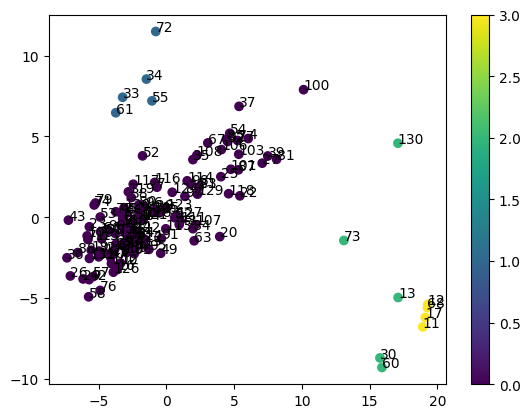

In [87]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_10)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_10):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [88]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, labelsRBF_10)
silhouette_avg

0.37830058232990305

In [89]:
# Calcular el índice de silueta para cada muestra

silhouette_values = silhouette_samples(data_processed, labelsRBF_10)


# Calcular el índice de silueta individual promedio para cada clúster

cluster_indices = sorted(set(labelsRBF_10))

for cluster_idx in cluster_indices:

    # Obtener las muestras pertenecientes al clúster actual

    cluster_samples = silhouette_values[labelsRBF_10 == cluster_idx]

    cluster_avg_silhouette = cluster_samples.mean()

    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")

Índice de Silueta del Clúster 0: 0.3806901366128362
Índice de Silueta del Clúster 1: 0.24378087126956155
Índice de Silueta del Clúster 2: 0.14198913177046488
Índice de Silueta del Clúster 3: 0.7707502944373661


In [90]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering10.n_clusters):

    cluster_indices = np.where(labelsRBF_10 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")

Cluster 1:
- Atributo n. 1: V_media (Media: 4.0)
- Atributo n. 4: SP_media (Media: 2.41015625)
- Atributo n. 2: SA_media (Media: 4.078125)
- Atributo n. 3: SI_media (Media: 4.048177083333333)
- Atributo n. 11: CJ_media (Media: 2.8697916666666665)
Cluster 2:
- Atributo n. 1: V_media (Media: 3.5)
- Atributo n. 2: SA_media (Media: 3.8333333333333335)
- Atributo n. 3: SI_media (Media: 5.0)
- Atributo n. 4: SP_media (Media: 3.6666666666666665)
- Atributo n. 11: CJ_media (Media: -1.0)
Cluster 3:
- Atributo n. 4: SP_media (Media: 3.333333333333333)
- Atributo n. 2: SA_media (Media: 3.6666666666666665)
- Atributo n. 3: SI_media (Media: 4.333333333333333)
- Atributo n. 5: SF_media (Media: 4.0)
- Atributo n. 11: CJ_media (Media: -1.0)
Cluster 4:
- Atributo n. 2: SA_media (Media: 5.0)
- Atributo n. 3: SI_media (Media: 4.833333333333334)
- Atributo n. 1: V_media (Media: 4.666666666666666)
- Atributo n. 11: CJ_media (Media: -1.0)
- Atributo n. 14: LS_media (Media: -1.0)


## B.2.2) Clustering11: matriz de afinidad RBF - kmeans - n_clusters=97

In [91]:
n_clusters = 97
spectral_clustering11 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)
labelsRBF_11 = spectral_clustering11.fit_predict(affinity_matrix_rbf)
labelsRBF_11

array([18, 18, 94, 35, 24, 44, 73, 11, 73, 96, 59, 41, 41, 17, 33, 81, 72,
       41, 59, 86,  5, 36, 13, 74, 64, 22, 51, 28, 56, 78, 30, 60, 18, 16,
        9, 32, 51,  3, 62,  7, 59, 61, 78, 66, 77, 65, 68, 82, 79, 10, 57,
       89, 23, 18, 26,  4, 88, 82, 52, 18, 30, 39, 73, 49, 18, 75, 18, 15,
       41, 18, 44, 93,  1,  8, 76, 59, 53, 46, 69, 47, 44, 55, 87, 40, 70,
       37, 71, 14, 93, 88, 44, 63, 48, 91,  0, 44, 85, 34, 27, 83,  6, 29,
       59, 20, 88, 50, 58, 25, 21, 69, 90, 70, 54, 18, 38, 88, 84, 45, 12,
       19, 67, 31, 44, 44, 43, 44, 18, 92, 80, 42,  2, 59, 95],
      dtype=int32)

In [ ]:
data_processed['Cluster']=labelsRBF_11
data_processed

In [ ]:
data_processed.to_csv("spectralClusteringLabels11_data_cleaned.csv", sep=";", index=False)

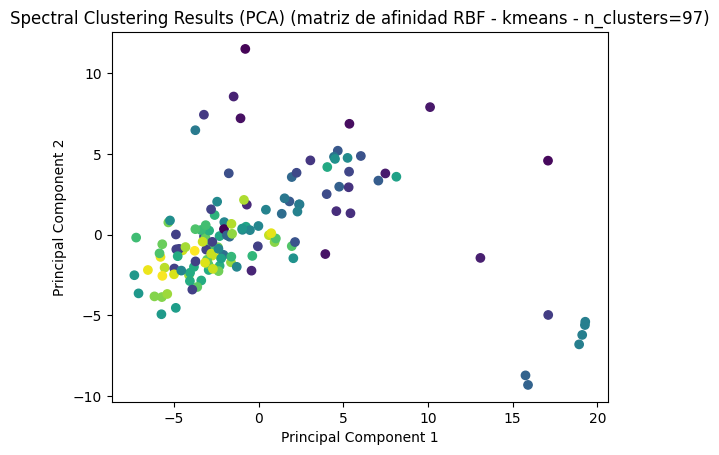

In [92]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_11)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=97)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_11)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=97)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_11)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - kmeans - n_clusters=97)')
    plt.show()

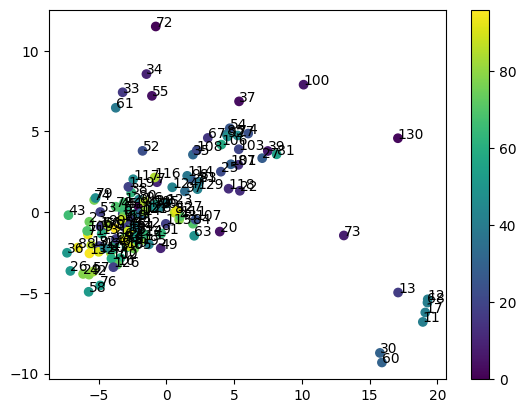

In [93]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_11)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_11):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [94]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, labelsRBF_11)
silhouette_avg

0.019762760809159768

In [95]:
# Calcular el índice de silueta para cada muestra

silhouette_values = silhouette_samples(data_processed, labelsRBF_11)


# Calcular el índice de silueta individual promedio para cada clúster

cluster_indices = sorted(set(labelsRBF_11))

for cluster_idx in cluster_indices:

    # Obtener las muestras pertenecientes al clúster actual

    cluster_samples = silhouette_values[labelsRBF_11 == cluster_idx]

    cluster_avg_silhouette = cluster_samples.mean()

    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")

Índice de Silueta del Clúster 0: 0.0
Índice de Silueta del Clúster 1: 0.0
Índice de Silueta del Clúster 2: 0.0
Índice de Silueta del Clúster 3: 0.0
Índice de Silueta del Clúster 4: 0.0
Índice de Silueta del Clúster 5: 0.0
Índice de Silueta del Clúster 6: 0.0
Índice de Silueta del Clúster 7: 0.0
Índice de Silueta del Clúster 8: 0.0
Índice de Silueta del Clúster 9: 0.0
Índice de Silueta del Clúster 10: 0.0
Índice de Silueta del Clúster 11: 0.0
Índice de Silueta del Clúster 12: 0.0
Índice de Silueta del Clúster 13: 0.0
Índice de Silueta del Clúster 14: 0.0
Índice de Silueta del Clúster 15: 0.0
Índice de Silueta del Clúster 16: 0.0
Índice de Silueta del Clúster 17: 0.0
Índice de Silueta del Clúster 18: -0.1830896155359591
Índice de Silueta del Clúster 19: 0.0
Índice de Silueta del Clúster 20: 0.0
Índice de Silueta del Clúster 21: 0.0
Índice de Silueta del Clúster 22: 0.0
Índice de Silueta del Clúster 23: 0.0
Índice de Silueta del Clúster 24: 0.0
Índice de Silueta del Clúster 25: 0.0
Índice

In [96]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering11.n_clusters):

    cluster_indices = np.where(labelsRBF_11 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")

Cluster 1:
- Atributo n. 1: V_media (Media: 4.0)
- Atributo n. 4: SP_media (Media: 2.41015625)
- Atributo n. 11: CJ_media (Media: 2.8697916666666665)
- Atributo n. 2: SA_media (Media: 4.078125)
- Atributo n. 7: CH_media (Media: 3.5416666666666665)
Cluster 2:
- Atributo n. 1: V_media (Media: 3.5)
- Atributo n. 2: SA_media (Media: 3.8333333333333335)
- Atributo n. 3: SI_media (Media: 5.0)
- Atributo n. 7: CH_media (Media: 3.6666666666666665)
- Atributo n. 4: SP_media (Media: 3.6666666666666665)
Cluster 3:
- Atributo n. 4: SP_media (Media: 3.333333333333333)
- Atributo n. 3: SI_media (Media: 4.333333333333333)
- Atributo n. 5: SF_media (Media: 4.0)
- Atributo n. 2: SA_media (Media: 3.6666666666666665)
- Atributo n. 13: CI_media (Media: -1.0)
Cluster 4:
- Atributo n. 1: V_media (Media: 4.666666666666666)
- Atributo n. 8: CE_media (Media: -1.0)
- Atributo n. 4: SP_media (Media: 3.5)
- Atributo n. 3: SI_media (Media: 4.833333333333334)
- Atributo n. 2: SA_media (Media: 5.0)
Cluster 5:
- Atri

## B.2.3) Clustering12: matriz de afinidad RBF - kmeans - n_clusters=27

In [97]:
n_clusters = 27
spectral_clustering12 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)
labelsRBF_12 = spectral_clustering12.fit_predict(affinity_matrix_rbf)
labelsRBF_12

array([ 0,  0,  0,  0, 15,  0,  0,  9,  0,  0,  0, 23, 23, 14,  0,  0,  0,
       23,  0,  0, 13,  0, 12,  0,  0, 19,  0, 24,  0,  0, 14,  0,  0,  3,
        3, 20,  0,  2,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 20,  0, 21,  3,  0,  0,  0,  0, 14,  3,  0,  0,  0,  0,  0, 17,
       23,  0,  0,  0, 11,  1,  0,  0,  0, 26,  0,  0,  0, 15,  0, 25,  0,
       16,  0, 10,  0,  0,  0,  0, 16,  0,  0,  0,  0, 25, 22,  0,  4, 26,
        0, 18,  0, 25,  0,  0,  7,  0,  0,  0,  0,  0, 22,  0,  0,  0,  8,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  6,  0,  0],
      dtype=int32)

In [ ]:
data_processed['Cluster']=labelsRBF_12
data_processed

In [ ]:
data_processed.to_csv("spectralClusteringLabels12_data_cleaned.csv", sep=";", index=False)

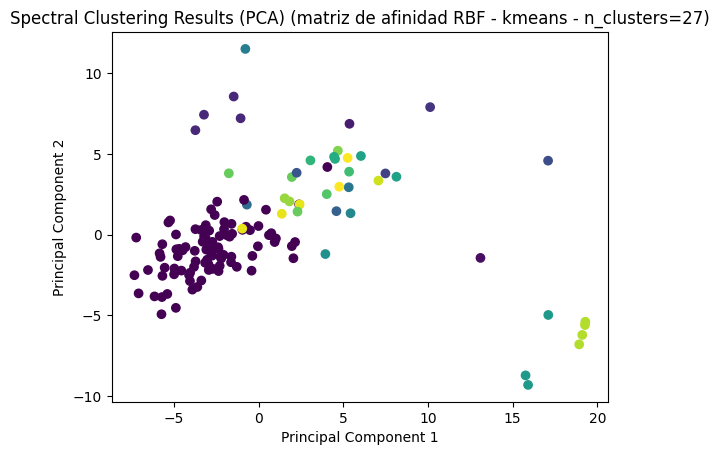

In [98]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_12)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=27)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_12)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=27)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_12)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - kmeans - n_clusters=27)')
    plt.show()

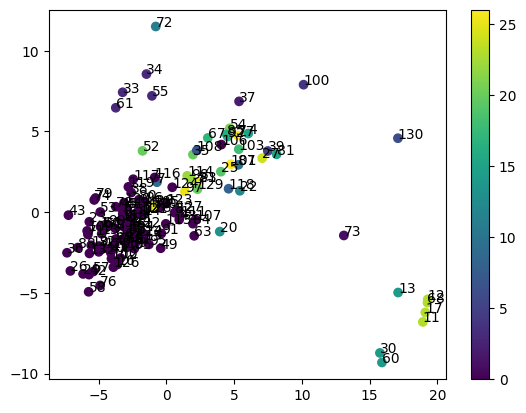

In [99]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_12)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_12):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [100]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, labelsRBF_12)
silhouette_avg

0.15896840877128973

In [101]:
# Calcular el índice de silueta para cada muestra

silhouette_values = silhouette_samples(data_processed, labelsRBF_12)


# Calcular el índice de silueta individual promedio para cada clúster

cluster_indices = sorted(set(labelsRBF_12))

for cluster_idx in cluster_indices:

    # Obtener las muestras pertenecientes al clúster actual

    cluster_samples = silhouette_values[labelsRBF_12 == cluster_idx]

    cluster_avg_silhouette = cluster_samples.mean()

    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")

Índice de Silueta del Clúster 0: 0.15765159891248828
Índice de Silueta del Clúster 1: 0.0
Índice de Silueta del Clúster 2: 0.0
Índice de Silueta del Clúster 3: 0.3142337894027178
Índice de Silueta del Clúster 4: 0.0
Índice de Silueta del Clúster 5: 0.0
Índice de Silueta del Clúster 6: 0.0
Índice de Silueta del Clúster 7: 0.0
Índice de Silueta del Clúster 8: 0.0
Índice de Silueta del Clúster 9: 0.0
Índice de Silueta del Clúster 10: 0.0
Índice de Silueta del Clúster 11: 0.0
Índice de Silueta del Clúster 12: 0.0
Índice de Silueta del Clúster 13: 0.0
Índice de Silueta del Clúster 14: 0.5070470307144469
Índice de Silueta del Clúster 15: 0.10512397390120257
Índice de Silueta del Clúster 16: 0.10974446083649828
Índice de Silueta del Clúster 17: 0.0
Índice de Silueta del Clúster 18: 0.0
Índice de Silueta del Clúster 19: 0.0
Índice de Silueta del Clúster 20: 0.006593724421663779
Índice de Silueta del Clúster 21: 0.0
Índice de Silueta del Clúster 22: 0.09029449771616982
Índice de Silueta del Clú

In [102]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering12.n_clusters):

    cluster_indices = np.where(labelsRBF_12 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")

Cluster 1:
- Atributo n. 1: V_media (Media: 4.0)
- Atributo n. 4: SP_media (Media: 2.41015625)
- Atributo n. 2: SA_media (Media: 4.078125)
- Atributo n. 3: SI_media (Media: 4.048177083333333)
- Atributo n. 11: CJ_media (Media: 2.8697916666666665)
Cluster 2:
- Atributo n. 4: SP_media (Media: 3.6666666666666665)
- Atributo n. 11: CJ_media (Media: -1.0)
- Atributo n. 1: V_media (Media: 3.5)
- Atributo n. 2: SA_media (Media: 3.8333333333333335)
- Atributo n. 5: SF_media (Media: 4.333333333333333)
Cluster 3:
- Atributo n. 1: V_media (Media: 3.6666666666666665)
- Atributo n. 8: CE_media (Media: -1.0)
- Atributo n. 4: SP_media (Media: 3.333333333333333)
- Atributo n. 3: SI_media (Media: 4.333333333333333)
- Atributo n. 2: SA_media (Media: 3.6666666666666665)
Cluster 4:
- Atributo n. 1: V_media (Media: 4.666666666666666)
- Atributo n. 2: SA_media (Media: 5.0)
- Atributo n. 3: SI_media (Media: 4.833333333333334)
- Atributo n. 4: SP_media (Media: 3.5)
- Atributo n. 11: CJ_media (Media: -1.0)
Clu

In [103]:
#13.Clustering13: matriz de afinidad RBF - kmeans - n_clusters=97 random_state=2
n_clusters = 97
spectral_clustering13 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=2)
labelsRBF_13 = spectral_clustering13.fit_predict(affinity_matrix_rbf)
labelsRBF_13

array([43, 22, 43, 30, 55, 79, 21, 11, 21, 22, 43, 31, 31, 14, 56, 90, 89,
       31, 95, 94,  4, 42, 17, 64, 57, 29, 78, 36, 74, 65, 35, 61, 22, 18,
        8, 34, 78,  3, 72,  7, 22, 85, 65, 60, 75, 50, 66, 81, 53, 16, 82,
       83, 28, 22, 25,  5, 63, 81, 44, 43, 35, 47, 22, 77, 22, 84, 22, 12,
       31, 22, 79, 87,  1,  9, 73, 22, 54, 27, 68, 41, 79, 24, 45, 40, 39,
       51, 69, 15, 87, 63, 79, 70, 33, 86, 43, 91, 59, 49, 37, 43,  6, 62,
       43, 19, 63, 48, 67, 26, 23, 68, 88, 39,  0, 22, 46, 63, 96, 58, 13,
       20, 71, 38, 43, 79, 52, 10, 43, 80, 76, 32,  2, 93, 92],
      dtype=int32)

In [ ]:
data_processed['Cluster']=labelsRBF_13
data_processed

In [ ]:
data_processed.to_csv("spectralClusteringLabels13_data_cleaned.csv", sep=";", index=False)

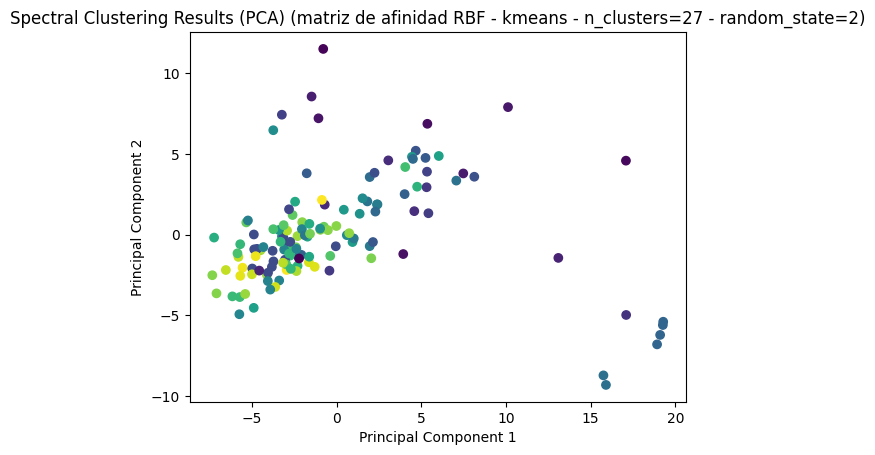

In [104]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_13)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=27 - random_state=2)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_13)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=27 - random_state=2)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_13)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - kmeans - n_clusters=27 - random_state=2)')
    plt.show()

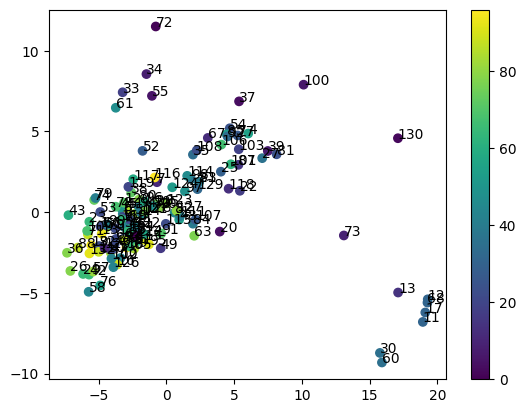

In [105]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_13)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_13):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [106]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, labelsRBF_13)
silhouette_avg

0.024657977204421155

In [107]:
# Calcular el índice de silueta para cada muestra

silhouette_values = silhouette_samples(data_processed, labelsRBF_13)


# Calcular el índice de silueta individual promedio para cada clúster

cluster_indices = sorted(set(labelsRBF_13))

for cluster_idx in cluster_indices:

    # Obtener las muestras pertenecientes al clúster actual

    cluster_samples = silhouette_values[labelsRBF_13 == cluster_idx]

    cluster_avg_silhouette = cluster_samples.mean()

    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")

Índice de Silueta del Clúster 0: 0.0
Índice de Silueta del Clúster 1: 0.0
Índice de Silueta del Clúster 2: 0.0
Índice de Silueta del Clúster 3: 0.0
Índice de Silueta del Clúster 4: 0.0
Índice de Silueta del Clúster 5: 0.0
Índice de Silueta del Clúster 6: 0.0
Índice de Silueta del Clúster 7: 0.0
Índice de Silueta del Clúster 8: 0.0
Índice de Silueta del Clúster 9: 0.0
Índice de Silueta del Clúster 10: 0.0
Índice de Silueta del Clúster 11: 0.0
Índice de Silueta del Clúster 12: 0.0
Índice de Silueta del Clúster 13: 0.0
Índice de Silueta del Clúster 14: 0.0
Índice de Silueta del Clúster 15: 0.0
Índice de Silueta del Clúster 16: 0.0
Índice de Silueta del Clúster 17: 0.0
Índice de Silueta del Clúster 18: 0.0
Índice de Silueta del Clúster 19: 0.0
Índice de Silueta del Clúster 20: 0.0
Índice de Silueta del Clúster 21: 0.345834910549075
Índice de Silueta del Clúster 22: -0.18165605634051452
Índice de Silueta del Clúster 23: 0.0
Índice de Silueta del Clúster 24: 0.0
Índice de Silueta del Clúster

In [108]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering13.n_clusters):

    cluster_indices = np.where(labelsRBF_13 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")

Cluster 1:
- Atributo n. 1: V_media (Media: 4.0)
- Atributo n. 4: SP_media (Media: 2.41015625)
- Atributo n. 2: SA_media (Media: 4.078125)
- Atributo n. 8: CE_media (Media: 3.80859375)
- Atributo n. 7: CH_media (Media: 3.5416666666666665)
Cluster 2:
- Atributo n. 1: V_media (Media: 3.5)
- Atributo n. 2: SA_media (Media: 3.8333333333333335)
- Atributo n. 3: SI_media (Media: 5.0)
- Atributo n. 7: CH_media (Media: 3.6666666666666665)
- Atributo n. 4: SP_media (Media: 3.6666666666666665)
Cluster 3:
- Atributo n. 4: SP_media (Media: 3.333333333333333)
- Atributo n. 3: SI_media (Media: 4.333333333333333)
- Atributo n. 5: SF_media (Media: 4.0)
- Atributo n. 2: SA_media (Media: 3.6666666666666665)
- Atributo n. 13: CI_media (Media: -1.0)
Cluster 4:
- Atributo n. 1: V_media (Media: 4.666666666666666)
- Atributo n. 8: CE_media (Media: -1.0)
- Atributo n. 4: SP_media (Media: 3.5)
- Atributo n. 3: SI_media (Media: 4.833333333333334)
- Atributo n. 2: SA_media (Media: 5.0)
Cluster 5:
- Atributo n. 1

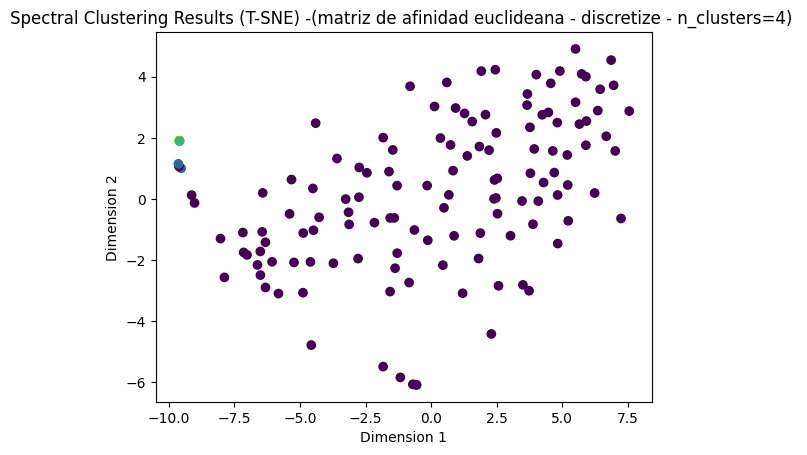

In [109]:
#T-SNE (t-Distributed Stochastic Neighbor Embedding)

# Reducción de dimensionalidad con T-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualización en un gráfico de dispersión
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels1)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Spectral Clustering Results (T-SNE) -(matriz de afinidad euclideana - discretize - n_clusters=4) ')
plt.show()


# Gráfico radar
   * Si tus datos tienen características numéricas, puedes utilizar un gráfico de radar para visualizar las características promedio de cada clúster.
   * Cada clúster se representa como un polígono y la posición de los vértices del polígono corresponde a los valores promedio de las características en ese clúster.

## Gráfico radar: matriz de afinidad euclideana - discretize - n_clusters=4

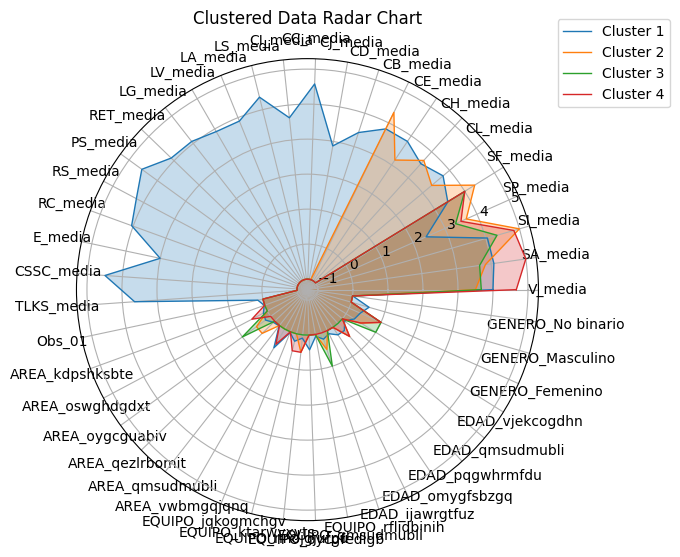

In [110]:
# Calcular los valores promedio de las características por clúster
cluster_means = data_processed.groupby(labels1).mean()

# Crear el gráfico de radar
categories = list(cluster_means.columns)
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})
for i in range(len(cluster_means)):
    values = cluster_means.iloc[i].values.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, label=f'Cluster {i+1}')
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Clustered Data Radar Chart')
plt.show()


## Gráfico radar:  matriz de afinidad euclideana - kmeans - n_clusters=4

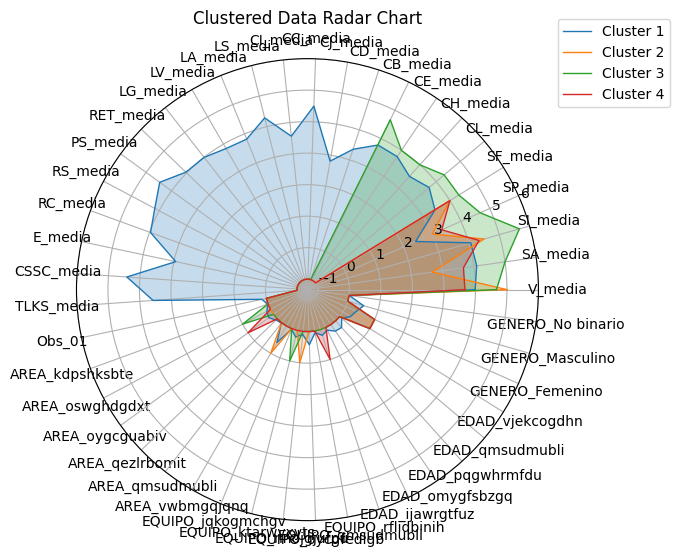

In [111]:
# Calcular los valores promedio de las características por clúster
cluster_means = data_processed.groupby(labels4).mean()

# Crear el gráfico de radar
categories = list(cluster_means.columns)
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})
for i in range(len(cluster_means)):
    values = cluster_means.iloc[i].values.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, label=f'Cluster {i+1}')
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Clustered Data Radar Chart')
plt.show()

## Gráfico radar: matriz de afinidad RBF - kmeans - n_clusters=27

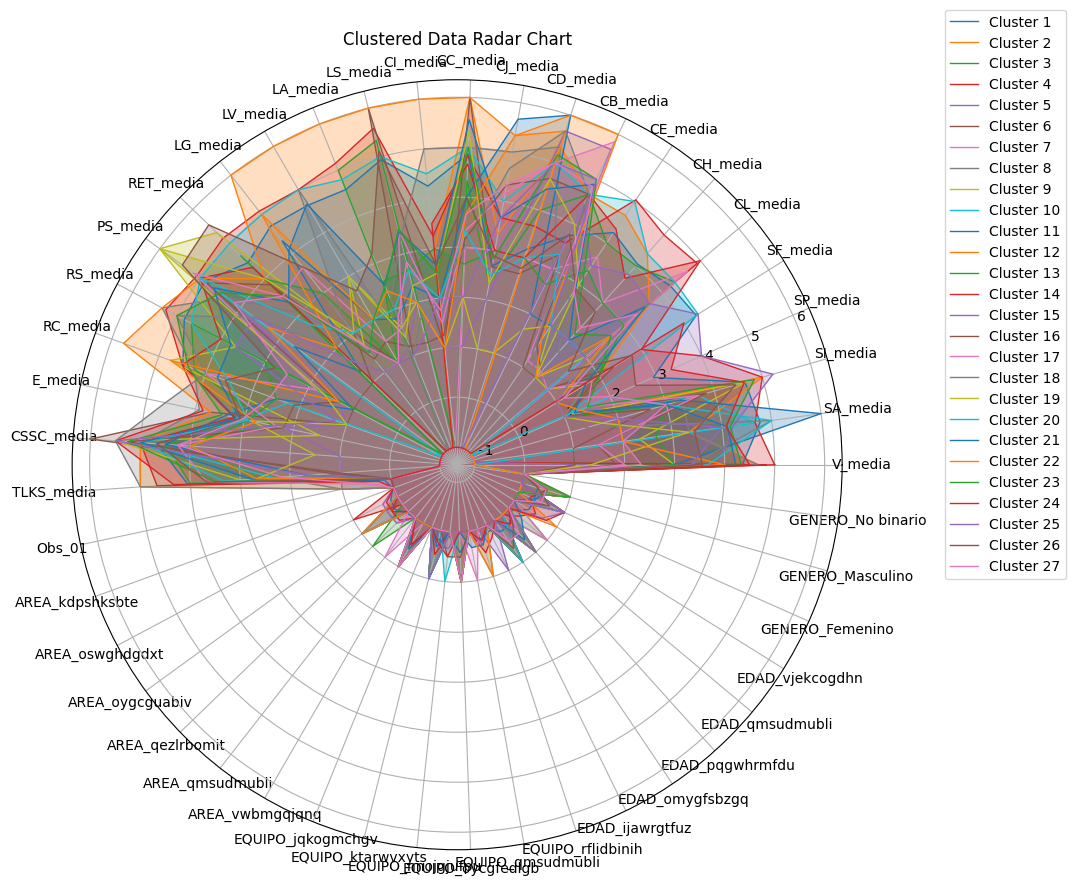

In [112]:
# Calcular los valores promedio de las características por clúster
cluster_means = data_processed.groupby(labelsRBF_12).mean()

# Crear el gráfico de radar
categories = list(cluster_means.columns)
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'polar': True})
for i in range(len(cluster_means)):
    values = cluster_means.iloc[i].values.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, label=f'Cluster {i+1}')
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Clustered Data Radar Chart')
plt.show()